# Machine Learning Project for Marketing Campaign
## Kelompok 7 : Emergency Code 7

#### Exploratory Data Analysis Team (Data Analyst):

Vito Muhammad

Dean Dwi Mahendra

Widia Nurlina Rahayu

#### Feature Engineering Team (Data Engineer):

Daris Rayhan Handoko

Nurhidayah Tasmin

#### Machine Learning Team:

Muh. Rizki Alim

Sri Devi

* Data yang digunakan di sini adalah data marketing campaign dengan keterangan kolom-kolom data sebagai berikut:

**AcceptedCmp1** - 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
**AcceptedCmp2** - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
**AcceptedCmp3** - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
**AcceptedCmp4** - 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
**AcceptedCmp5** - 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
**Response (target)** - 1 if customer accepted the offer in the last campaign, 0 otherwise<br>
**Complain** - 1 if customer complained in the last 2 years<br>
**DtCustomer** - date of customer’s enrolment with the company<br>
**Education** - customer’s level of education<br>
**Marital** - customer’s marital status<br>
**Kidhome** - number of small children in customer’s household<br>
**Teenhome** - number of teenagers in customer’s household<br>
**Income** - customer’s yearly household income<br>
**MntFishProducts** - amount spent on fish products in the last 2 years<br>
**MntMeatProducts** - amount spent on meat products in the last 2 years<br>
**MntFruits** - amount spent on fruits products in the last 2 years<br>
**MntSweetProducts** - amount spent on sweet products in the last 2 years<br>
**MntWines** - amount spent on wine products in the last 2 years<br>
**MntGoldProds** - amount spent on gold products in the last 2 years<br>
**NumDealsPurchases** - number of purchases made with discount<br>
**NumCatalogPurchases** - number of purchases made using catalogue<br>
**NumStorePurchases** - number of purchases made directly in stores<br>
**umWebPurchases** - number of purchases made through company’s web site<br>
**NumWebVisitsMonth** - number of visits to company’s web site in the last month<br>
**Recency** - number of days since the last purchase<br>

## EXPLORATORY DATA ANALYSIS (EDA) (STAGE 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep=';')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
### Menambah kolom tanggal acuan data dikumpulkan
df['Observed_Time'] = '2015-02-02'
df['Observed_Time'] = pd.to_datetime(df['Observed_Time'])
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [5]:
### Membuat kolom umur dari data Year_Birth agar lebih mudah dipahami
df['Umur'] = 2015 - df['Year_Birth']

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Umur
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2015-02-02,58
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2015-02-02,61
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2015-02-02,50
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2015-02-02,31
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2015-02-02,34


In [7]:
## Mengkelompokkan kategori customer kedalam segmentasi berdasarkan kelahiran

kel=[]
for i in range(len(df)):
    if df['Year_Birth'][i]<1945:
        kel.append('Pre-boomer')
    elif df['Year_Birth'][i]<=1946 or df['Year_Birth'][i]<=1964 :
        kel.append('Baby boomers')
    elif df['Year_Birth'][i]<=1965 or df['Year_Birth'][i]<=1980 :
        kel.append('Generasi X')
    elif df['Year_Birth'][i]<=1981 or df['Year_Birth'][i]<=1996 :
        kel.append('Generasi Y')
    else:
        kel.append('Generasi Z')
        
df['Kelompok_Usia'] = kel
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Umur,Kelompok_Usia
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2015-02-02,58,Baby boomers
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2015-02-02,61,Baby boomers
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2015-02-02,50,Generasi X
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2015-02-02,31,Generasi Y
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2015-02-02,34,Generasi Y


In [8]:
#Check Duplicate
print(df.shape)

print('Jumlah kolom yang terduplikasi :', df.duplicated().sum())

(2240, 32)
Jumlah kolom yang terduplikasi : 0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

* #### 1. Berdasarkan summary info diatas maka kita mempunyai 3 kelompok kategorikal
* #### 2. Hanya kolom Income yang memiliki nilai missing value
* #### 3. Tidak ada data yang terduplikasi

In [10]:
#missing Value
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Observed_Time           0
Umur                    0
Kelompok_Usia           0
dtype: int64


In [11]:
a = (24/2240)*100
print ("jumlah mising value pada kolom income yaitu sebesar", a, "%")

jumlah mising value pada kolom income yaitu sebesar 1.0714285714285714 %


In [12]:
### Kolom ID dapat diabaikan

numericals = ['Year_Birth','Income','Kidhome','Teenhome','Recency','NumDealsPurchases','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','AcceptedCmp4','Complain','Z_CostContact','Z_Revenue','Response','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds','Umur']
categoricals = ['Education','Marital_Status','kelompok_usia']
other = ['Complain', 'Z_CostContact', 'Z_Revenue']

belanja = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts', 'MntSweetProducts','MntGoldProds']
jenispembelian= ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
accepted_campaign = ['AcceptedCmp3','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','AcceptedCmp4']
target_variable = ['Response']

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [14]:
#sns.pairplot(data=df, x_vars=['Income', 'Umur', 'Recency'], y_vars=['Income', 'Umur', 'Recency'],  hue='Response')

In [15]:
## BIKIN BOXPLOT SEBARAN DATA

In [16]:
### daftar fungsi visualisasi

def visual_histplot(col):
    plt.figure(figsize=(6,4), dpi=100)
    sns.histplot(df[col],kde=True)
    plt.title('Distribusi data ' + col)
    plt.show()
    
def visual_boxplot(col):
    plt.figure(figsize=(6,4), dpi=100)
    sns.boxplot(df[col])
    plt.title('Distribusi data '+ col +' dalam bentuk Boxplot')
    plt.show()
    
def visual_countplot(col, hue=None):
    plt.figure(figsize=(6,4), dpi=100)
    sns.countplot(data=df, x=col, hue=hue)
    plt.title('Distribusi data ' + col)
    plt.show()

## Visualize the Data for Univariate Analysis

### INCOME

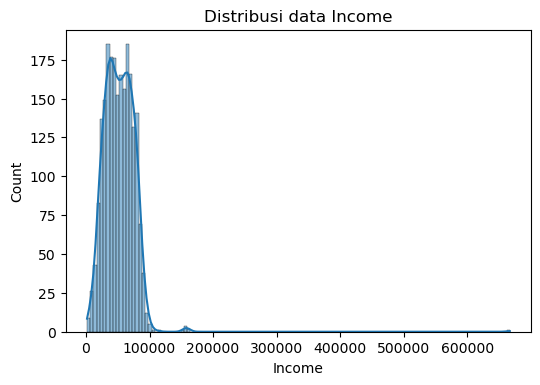

In [17]:
visual_histplot('Income')

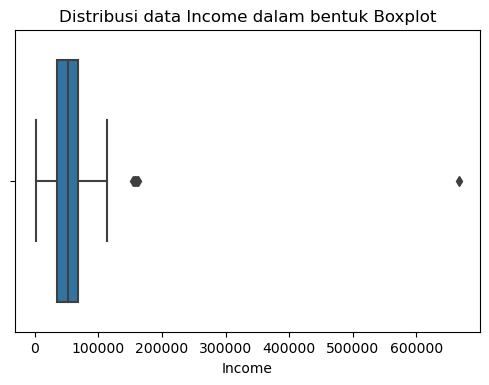

In [18]:
visual_boxplot('Income')

In [19]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

### UMUR

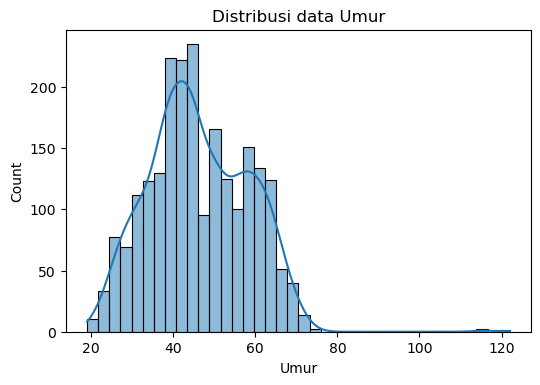

In [20]:
visual_histplot('Umur')

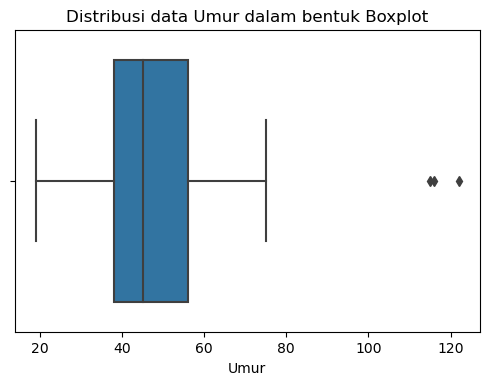

In [21]:
visual_boxplot('Umur')

In [22]:
df['Umur'].describe()

count    2240.000000
mean       46.194196
std        11.984069
min        19.000000
25%        38.000000
50%        45.000000
75%        56.000000
max       122.000000
Name: Umur, dtype: float64

### Education

In [23]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

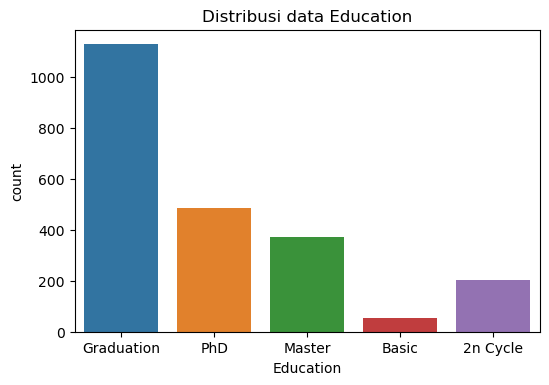

In [24]:
visual_countplot('Education')

## Marital Status

In [25]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

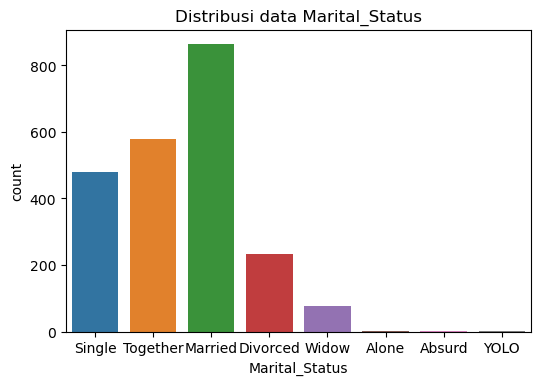

In [26]:
visual_countplot('Marital_Status')

## Recency

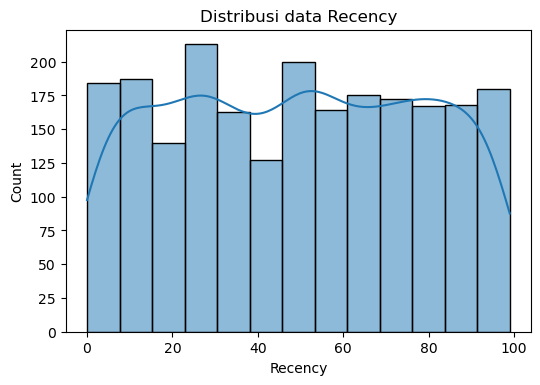

In [27]:
visual_histplot('Recency')

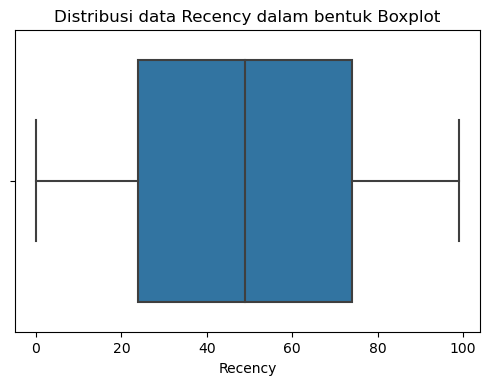

In [28]:
visual_boxplot('Recency')

In [29]:
df['Recency'].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

## Visualize the Data for Multivariate Analysis

* ### Visualisasi Target Variabel ( Kolom Response)

<AxesSubplot:xlabel='Response', ylabel='count'>

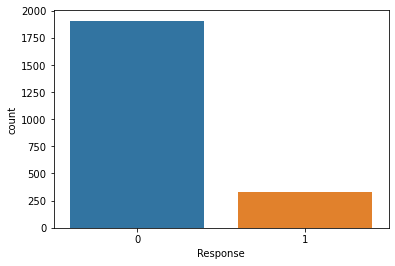

In [30]:
## Visualisasi target variable (y) yaitu pada kolom response

sns.countplot(data=df, x=df['Response'])

In [31]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [32]:
print('Tingkat keberhasilan (Response Rate) campaign terakhir adalah sebesar : '+ str(np.mean(df.Response==1) * 100) + ' %')

Tingkat keberhasilan (Response Rate) campaign terakhir adalah sebesar : 14.910714285714285 %


* ### Hubungan Recency dengan Response

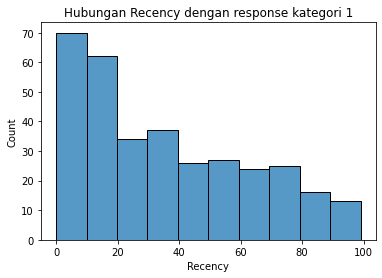

In [33]:
sns.histplot(x=df.Recency[df.Response==1])
plt.title('Hubungan Recency dengan response kategori 1');

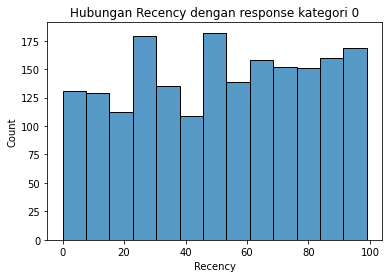

In [34]:
sns.histplot(x=df.Recency[df.Response==0])
plt.title('Hubungan Recency dengan response kategori 0');

* Berdasarkan tabel diatas seseorang yang memiliki recency lebih rendah lebih cenderung untuk menerima Response campaign marketing (**Hal ini dilihat dari sebaran recency pada kategori 1 didominasi customer dengan recency yang rendah**). Sedangkan sebaran recency pada kategori Response 0 tidak dapat diketahui hubungannya

* ### Hubungan atau History Campaign Sebelumnya dengan Campaign Terakhir (Response)

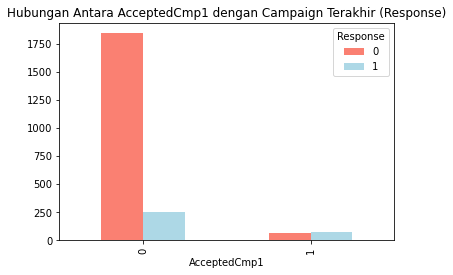

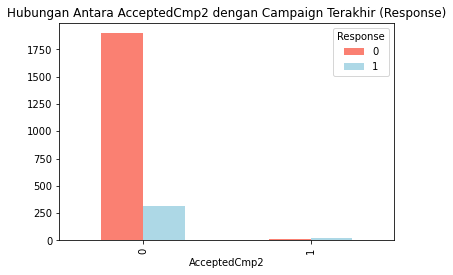

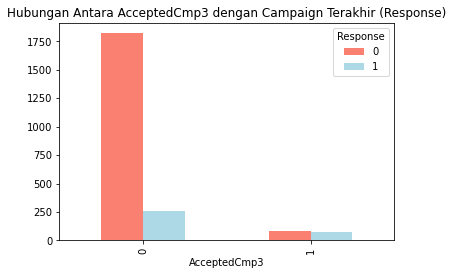

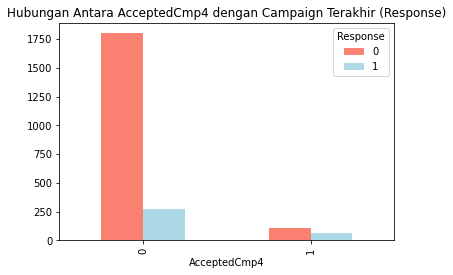

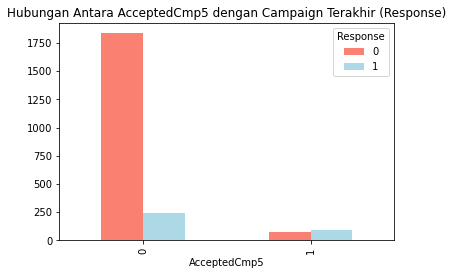

In [35]:
kolom = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

for col in kolom :
    pd.crosstab(df[col], df.Response).plot( kind ='bar', 
                                                    figsize=(6,4),
                                                    color = ['salmon','lightblue'])
    plt.title('Hubungan Antara '+ col + ' dengan Campaign Terakhir (Response)')

* Jika dilihat dari hubungan grafik diatas maka history campaign pertama hingga kelima terhadap response terhitung baik dimana awalnya ketika customer pada campaign sebelumnya tidak meresponse( response kategori 0), kemudian berubah pada campaign terakhir meresponse ( kategori response menjadi 1). Sedangkan jumlah campaign pertama hingga kelima yang awalnya meresponse campaign atau terkategori 1 yang kemudian tidak meresponse campaign terakhir atau menjadi kategori 0 pada response, jumlahnya lebih sedikit.

* ### Hubungan total campaign dengan spending dan purchase

In [36]:
df['Total_Campaign'] = df['AcceptedCmp1'] +df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['Total_Purchase'] = df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']
df['Total_Spending'] = df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines']

Text(0, 0.5, 'Total Spending')

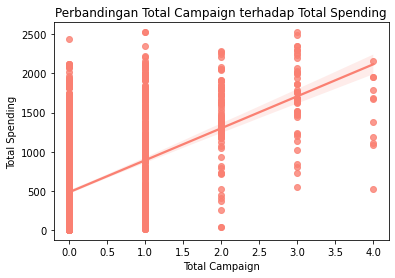

In [37]:
plt.figure(figsize=(6,4))
sns.regplot(df['Total_Campaign'],
           df['Total_Spending'],
           color='salmon')
plt.title('Perbandingan Total Campaign terhadap Total Spending')
plt.xlabel('Total Campaign')
plt.ylabel('Total Spending')

Text(0, 0.5, 'Total Purchase')

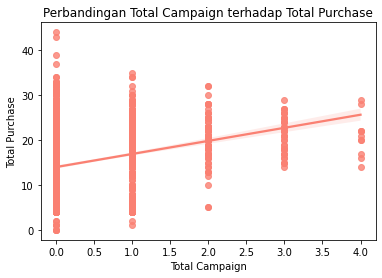

In [38]:
plt.figure(figsize=(6,4))
sns.regplot(df['Total_Campaign'],
           df['Total_Purchase'],
           color='salmon')
plt.title('Perbandingan Total Campaign terhadap Total Purchase')
plt.xlabel('Total Campaign')
plt.ylabel('Total Purchase')

* ### Hubungan antara Income and Spending tiap Produk pada Kasus Response kategori 1

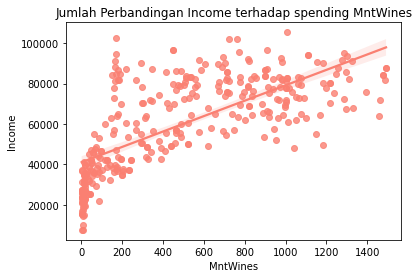

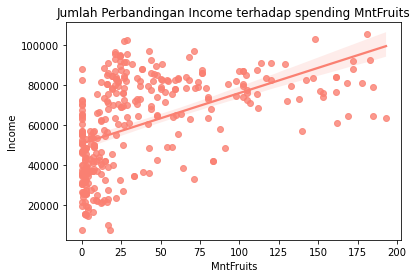

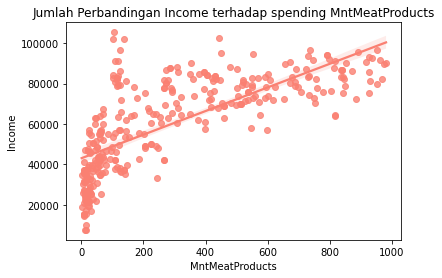

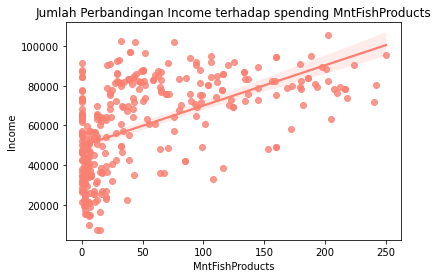

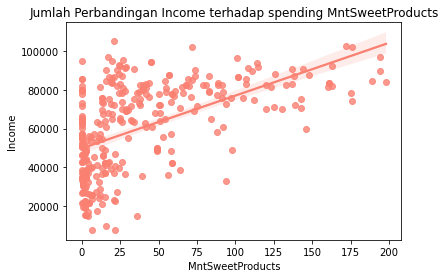

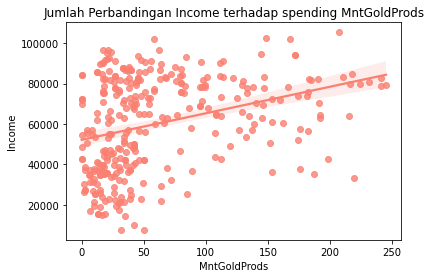

In [39]:
# Relation about Income and Spending amount pada Kasus Response kategori 1

for col in belanja:
    plt.figure(figsize=(6,4))
    sns.regplot(df[col][df.Response == 1],
           df.Income[df.Response == 1],
           color='salmon')
    plt.title('Jumlah Perbandingan Income terhadap spending ' + col)
    plt.xlabel(col)
    plt.ylabel('Income')

* berdasarkan grafik diatas dapat disimpulkan, ketika income semakin tinggi, kemungkinan spending amount pada suatu produk akan semakin besar

* ### Hubungan antara Income and jumlah jenis pembelian (NumPurchase) pada Kasus Response kategori 1

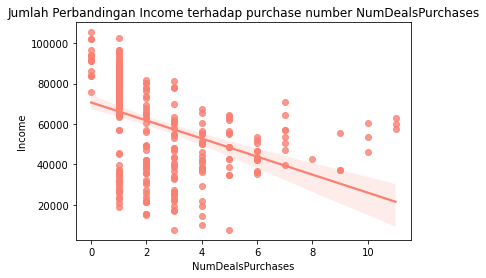

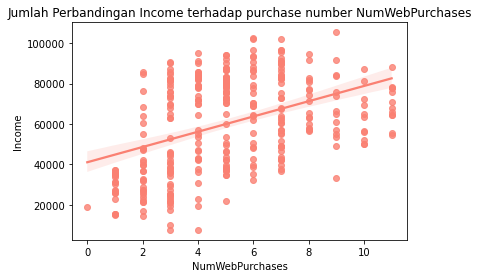

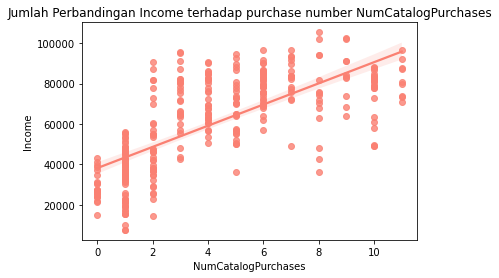

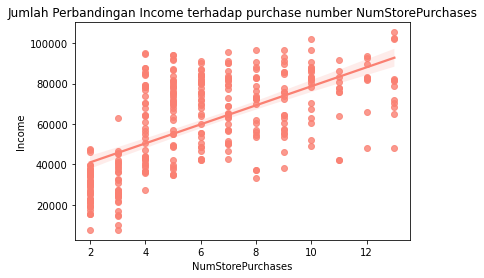

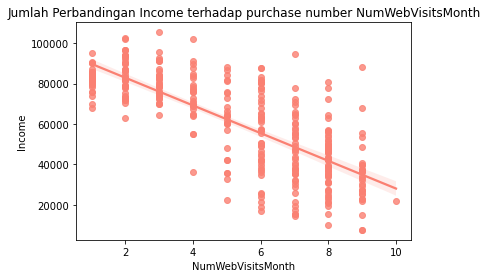

In [40]:
# Relation about Income and Spending amount pada Kasus Response kategori 1

for col in jenispembelian:
    plt.figure(figsize=(6,4))
    sns.regplot(df[col][df.Response == 1],
           df.Income[df.Response == 1],
           color='salmon')
    plt.title('Jumlah Perbandingan Income terhadap purchase number ' + col)
    plt.xlabel(col)
    plt.ylabel('Income')

* Berdasarkan tabel diatas, ketika seseorang memiliki income yang tinggi, semaking tinggi pula kemungkinan jumlah transaksi yang dilakukan. 
* Hal ini berbanding terbalik pada kategori transaksi bertipe diskon, dimana seseorang cenderung memanfaatkan diskon ketika income yang dimiliki cenderung rendah
* Seseorang dengan income yang cenderung rendah lebih sering mengujungi web yang diduga untuk melakukan pencarian produk secara cepat dan kemungkinan adanya tawaran diskon

In [41]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Umur,Kelompok_Usia,Total_Campaign,Total_Purchase,Total_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2015-02-02,58,Baby boomers,0,25,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2015-02-02,61,Baby boomers,0,6,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2015-02-02,50,Generasi X,0,21,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2015-02-02,31,Generasi Y,0,8,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2015-02-02,34,Generasi Y,0,19,422


In [42]:
## Sebaran data Education

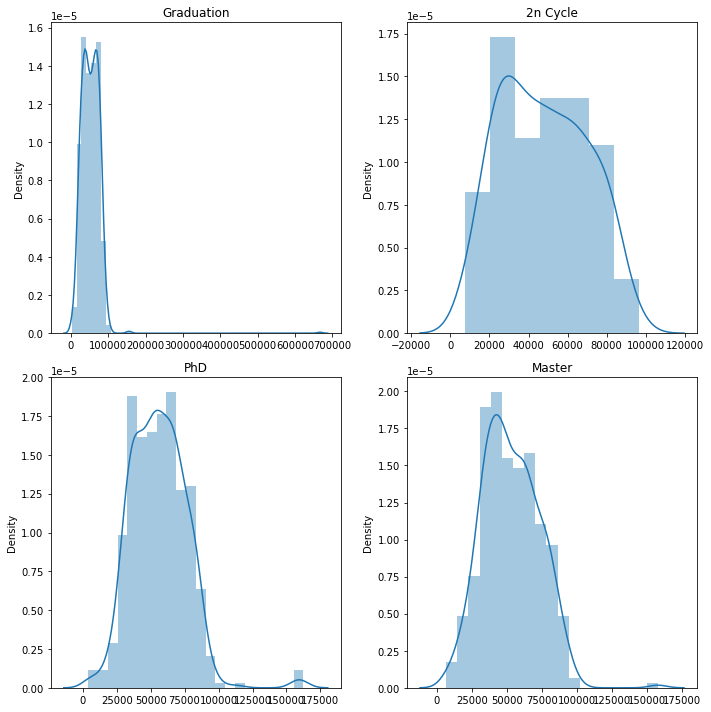

In [43]:
# Distplot
f, axes = plt.subplots(2, 2,figsize=(10,10))
ax1 = sns.distplot(df[df['Education']=='Graduation'][['Income']],ax=axes[0][0])
ax2 = sns.distplot(df[df['Education']=='2n Cycle'][['Income']],ax=axes[0][1])
ax3 = sns.distplot(df[df['Education']=='PhD'][['Income']],ax=axes[1][0])
ax4 = sns.distplot(df[df['Education']=='Master'][['Income']],ax=axes[1][1])
ax1.title.set_text('Graduation')
ax2.title.set_text('2n Cycle')
ax3.title.set_text('PhD')
ax4.title.set_text('Master')
plt.tight_layout()
plt.show()

In [44]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Umur,Kelompok_Usia,Total_Campaign,Total_Purchase,Total_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2015-02-02,58,Baby boomers,0,25,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2015-02-02,61,Baby boomers,0,6,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2015-02-02,50,Generasi X,0,21,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2015-02-02,31,Generasi Y,0,8,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2015-02-02,34,Generasi Y,0,19,422


* ### Hubungan mengenai lamanya customer bergabung (join) pada Kasus Response kategori 1

In [45]:
df['Join_Period'] = df['Observed_Time'].dt.to_period('M').astype(int) - df['Dt_Customer'].dt.to_period('M').astype(int)

## Lamanya bergabung dalam satuan nilai bulan ( berapa bulan telah bergabung )

In [46]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Umur,Kelompok_Usia,Total_Campaign,Total_Purchase,Total_Spending,Join_Period
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2015-02-02,58,Baby boomers,0,25,1617,29
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2015-02-02,61,Baby boomers,0,6,27,11
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2015-02-02,50,Generasi X,0,21,776,18
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2015-02-02,31,Generasi Y,0,8,53,12
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2015-02-02,34,Generasi Y,0,19,422,13


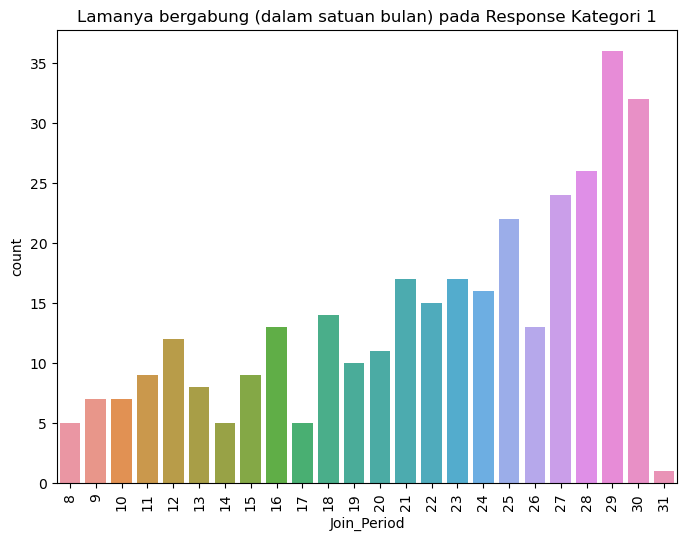

In [47]:
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(x=df.Join_Period[df.Response==1])
plt.xticks(rotation=90)
plt.title('Lamanya bergabung (dalam satuan bulan) pada Response Kategori 1')
plt.show()

In [48]:
## Menggabungkan kolom kids dan teenhome menjadi Jumlah_anak

df['Jumlah_Anak'] = df['Kidhome'] + df['Teenhome']

## DATA PREPROCESSING ( STAGE 2 )

* ### Feature Extraction

Pada langkah sebelumnya telah dilakukan beberapa feature extraction terlebih dahulu guna mendapat insight lebih jelas mengenai visualisasi data baik dalam bentuk univariate maupun multivariate analysis.

Kolom baru tersebut meliput :
* Umur
* Kelompok_usia
* Total_purchase
* Total_spending
* JoinPeriod
* Observed_Time

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

* ### Handling Missing Values

In [50]:
df['Income'].isnull().sum()

24

In [51]:
df.groupby('Education').median()[['Income']]

,Income
Education,
2n Cycle,46805.0
Basic,20744.0
Graduation,52028.5
Master,50943.0
PhD,55212.0


In [52]:
print('Kolom pada income yang memiliki nilai missing',df[df['Income'].isna()]['Education'].unique())

Kolom pada income yang memiliki nilai missing ['Graduation' 'PhD' '2n Cycle' 'Master']


In [53]:
## Impute nilai missing value pada income sesuai dengan tingkat edukasi customer dengan pendekatan nilai median

In [54]:
def fillna(col):
    if pd.isna(col['Income']):
        if col['Education'] == '2n Cycle':
            return 46805.0
        elif col['Education'] == 'Graduation':
            return 52028.5
        elif col['Education'] == 'PhD':
            return 55212.0
        elif col['Education'] == 'Master':
            return 50943.0
    else:
        return col['Income']

In [55]:
df['Income'] = df[['Education', 'Income']].apply(fillna, axis=1)

In [56]:
df['Income'].isna().sum()

0

* ### Handling Outliers

* #### Outliers pada kolom umur

In [57]:
pd.DataFrame(df['Umur'].sort_values(ascending=False))

,Umur
239,122
339,116
192,115
1950,75
424,74
...,...
696,20
747,20
995,20
1170,19


In [58]:
### membuang kolom umur diatas 100 tahun
### memfilter hanya umur dibawah 100 tahun

df = df[df.Umur < 100]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Umur,Kelompok_Usia,Total_Campaign,Total_Purchase,Total_Spending,Join_Period,Jumlah_Anak
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2015-02-02,58,Baby boomers,0,25,1617,29,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2015-02-02,61,Baby boomers,0,6,27,11,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2015-02-02,50,Generasi X,0,21,776,18,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2015-02-02,31,Generasi Y,0,8,53,12,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2015-02-02,34,Generasi Y,0,19,422,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2015-02-02,48,Generasi X,0,18,1341,20,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2015-02-02,69,Baby boomers,1,22,444,8,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2015-02-02,34,Generasi Y,1,19,1241,13,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2015-02-02,59,Baby boomers,0,23,843,13,1


* #### Outliers pada Income

In [59]:
from scipy import stats

In [60]:
# Handling Outlier Berdsarkan Z-Score
# Outlier umur dibuang karena dianggap tidak memiliki dampak yang signifikan jika outliernya dibuang

z_scores = np.abs(stats.zscore(df['Income']))
filtered_entries = (z_scores < 3)
df = df[filtered_entries]

df
# Terdapat 8 outlier yang dibuang berdasarkan kolom Income

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Umur,Kelompok_Usia,Total_Campaign,Total_Purchase,Total_Spending,Join_Period,Jumlah_Anak
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2015-02-02,58,Baby boomers,0,25,1617,29,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2015-02-02,61,Baby boomers,0,6,27,11,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2015-02-02,50,Generasi X,0,21,776,18,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2015-02-02,31,Generasi Y,0,8,53,12,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2015-02-02,34,Generasi Y,0,19,422,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2015-02-02,48,Generasi X,0,18,1341,20,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2015-02-02,69,Baby boomers,1,22,444,8,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2015-02-02,34,Generasi Y,1,19,1241,13,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2015-02-02,59,Baby boomers,0,23,843,13,1


* ### Membuang kolom yang tidak relevan

In [61]:
col_drop = ['ID', 'Year_Birth', 'Dt_Customer', 'Observed_Time', 'Complain', 'Z_CostContact', 'Z_Revenue']

df = df.drop(col_drop, axis=1)

In [62]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Umur,Kelompok_Usia,Total_Campaign,Total_Purchase,Total_Spending,Join_Period,Jumlah_Anak
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,58,Baby boomers,0,25,1617,29,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,61,Baby boomers,0,6,27,11,2
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,50,Generasi X,0,21,776,18,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,31,Generasi Y,0,8,53,12,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,34,Generasi Y,0,19,422,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,48,Generasi X,0,18,1341,20,1
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,69,Baby boomers,1,22,444,8,3
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,34,Generasi Y,1,19,1241,13,0
2238,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,59,Baby boomers,0,23,843,13,1


* ### Handling imbalanced data

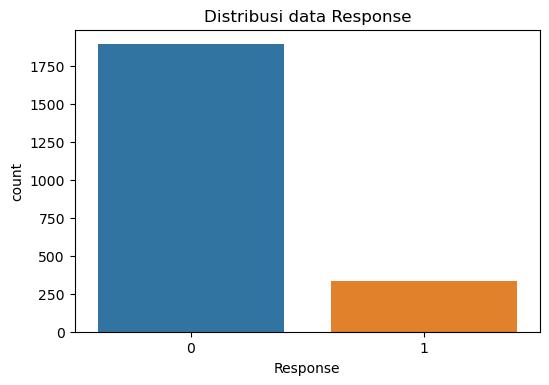

In [63]:
visual_countplot('Response')

**Terlihat bahwasanya data response atau target variabel tidak balanced secara merata, sehingga pada proses modelling nanti akan dilakukan proses oversampling pada data train dalam hal menangani imbalanced class**

* ### CORRELATION BETWEEN FEATURES

<AxesSubplot:>

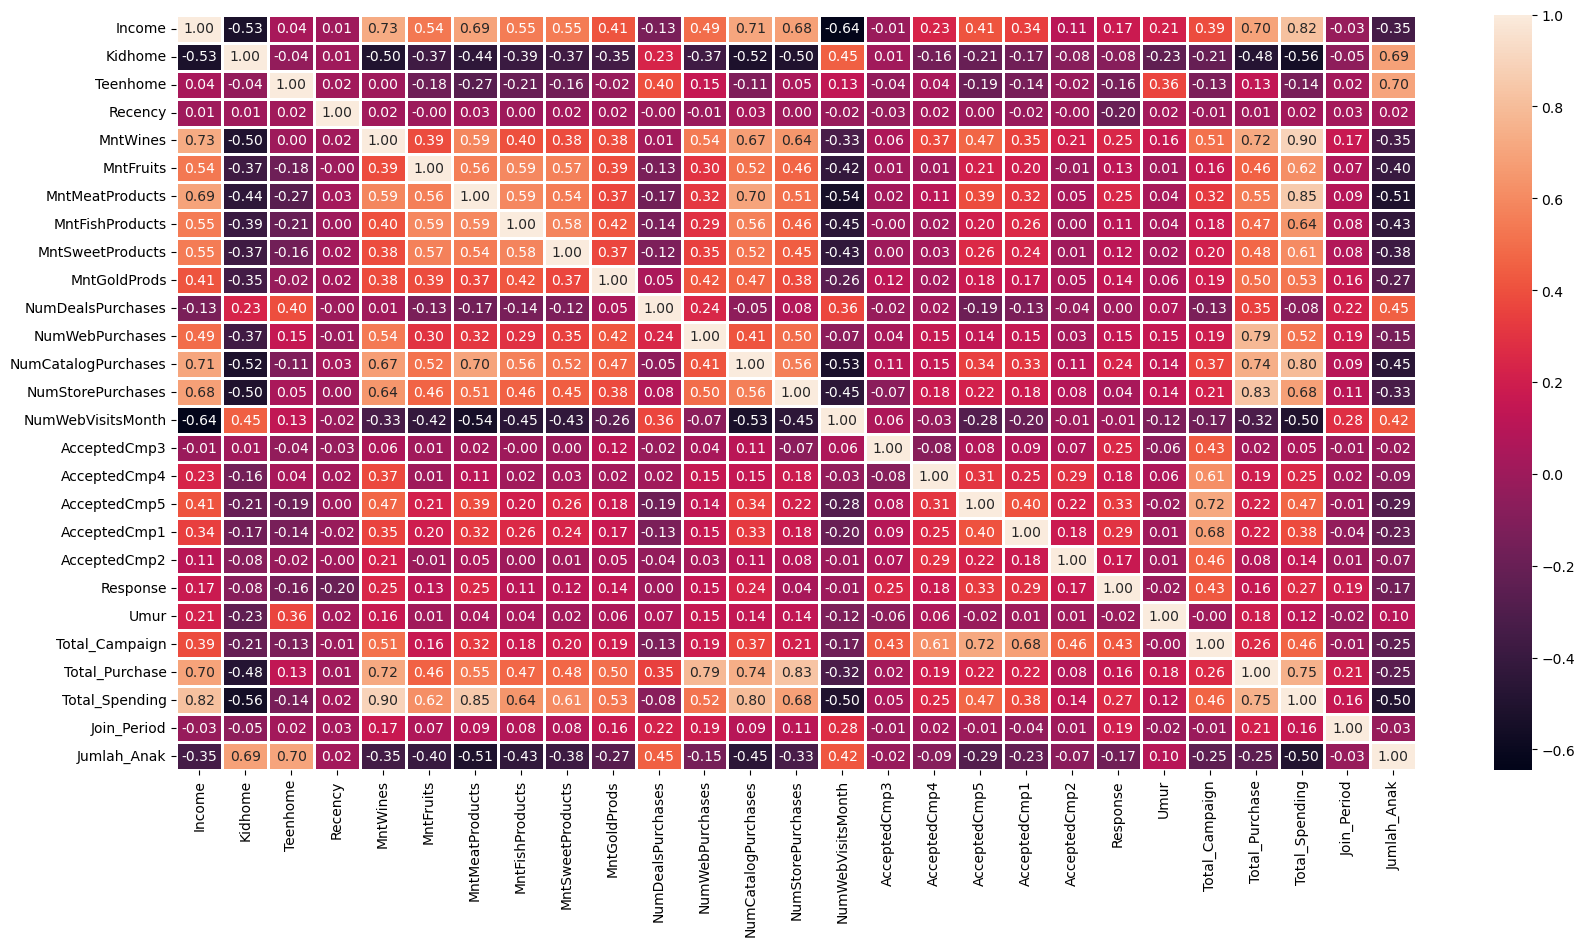

In [64]:
correlation_df = df.corr()

plt.figure(figsize=(20,10), dpi=100)
sns.heatmap(correlation_df, annot=True, linewidths=1, fmt='.2f')

* Dari grafik heatmap diatas masih ditemukan feature redundan atau korelasi antar feature yang memiliki nilai tinggi. Pada proses modelling nantinya akan dilakukan proses filtering feature lagi agar tidak terjadi overfitting pada hasil model yang diharapkan

In [65]:
corr = df.corr()['Response'].sort_values(ascending=False)
corr

Response               1.000000
Total_Campaign         0.425875
AcceptedCmp5           0.327911
AcceptedCmp1           0.293617
Total_Spending         0.266786
AcceptedCmp3           0.253838
MntMeatProducts        0.247103
MntWines               0.246534
NumCatalogPurchases    0.235325
Join_Period            0.194444
AcceptedCmp4           0.176544
Income                 0.174423
AcceptedCmp2           0.169131
Total_Purchase         0.156328
NumWebPurchases        0.147032
MntGoldProds           0.139726
MntFruits              0.125192
MntSweetProducts       0.116545
MntFishProducts        0.110609
NumStorePurchases      0.036697
NumDealsPurchases      0.003424
NumWebVisitsMonth     -0.007097
Umur                  -0.018918
Kidhome               -0.080514
Teenhome              -0.155726
Jumlah_Anak           -0.170480
Recency               -0.199078
Name: Response, dtype: float64

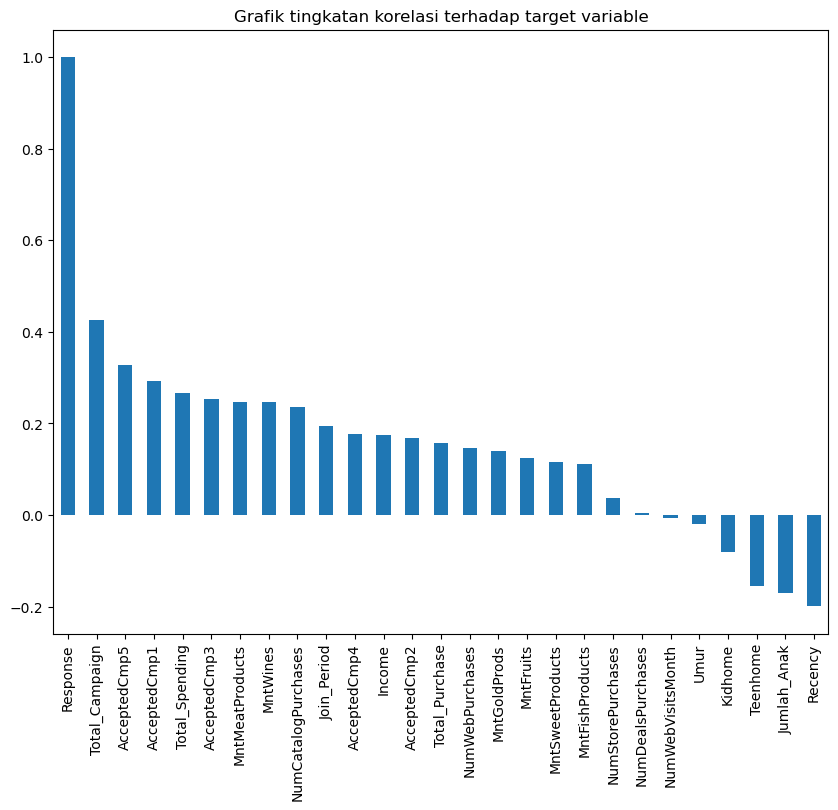

In [66]:
plt.figure(figsize=(10,8), dpi=100)
corr.plot(kind='bar')
plt.title('Grafik tingkatan korelasi terhadap target variable')
plt.show()

* Tingkat korelasi feature numeric dengan target tidak ada yang melebihi nilai 0.5 dan dapat dilihat secara berurutan feature mana yang memiliki nilai korelasi paling tinggi hingga terendah

## Standarisasi feature numerik

In [67]:
#  log gaji, amount spend in product & number of purchases kita standarisasi
#df['Umur'] = StandardScaler().fit_transform(df['Umur'].values.reshape(len(df), 1))
#df['Income'] = StandardScaler().fit_transform(df['Income'].values.reshape(len(df), 1))
#df['MntWines'] = StandardScaler().fit_transform(df['MntWines'].values.reshape(len(df), 1))
#df['MntFruits'] = StandardScaler().fit_transform(df['MntFruits'].values.reshape(len(df), 1))
#df['MntMeatProducts'] = StandardScaler().fit_transform(df['MntMeatProducts'].values.reshape(len(df), 1))
#df['MntFishProducts'] = StandardScaler().fit_transform(df['MntFishProducts'].values.reshape(len(df), 1))
#df['MntSweetProducts'] = StandardScaler().fit_transform(df['MntSweetProducts'].values.reshape(len(df), 1))
#df['MntGoldProds'] = StandardScaler().fit_transform(df['MntGoldProds'].values.reshape(len(df), 1))
#df['NumDealsPurchases'] = StandardScaler().fit_transform(df['NumDealsPurchases'].values.reshape(len(df), 1))
#df['NumWebPurchases'] = StandardScaler().fit_transform(df['NumWebPurchases'].values.reshape(len(df), 1))
#df['NumStorePurchases'] = StandardScaler().fit_transform(df['NumStorePurchases'].values.reshape(len(df), 1))
#df['NumWebVisitsMonth'] = StandardScaler().fit_transform(df['NumWebVisitsMonth'].values.reshape(len(df), 1))
#df['NumCatalogPurchases'] = StandardScaler().fit_transform(df['NumCatalogPurchases'].values.reshape(len(df), 1))
#df['Total_Spending'] = StandardScaler().fit_transform(df['Total_Spending'].values.reshape(len(df), 1))
#df['Total_Purchase'] = StandardScaler().fit_transform(df['Total_Purchase'].values.reshape(len(df), 1))

# MODELLING & EVALUATION ( STAGE 3)

### Pemilihan Dataset untuk proses Modelling sebagai alternative

Dataset yaitu df ini nantinya akan terbagi ke dalam berbagai skenario untuk mendapatkan nilai terbaik pada proses modelling

# DATASET 1

In [68]:
df_1 = df.copy()

In [69]:
# drop kolom yang tidak relevan atau memiliki korelasi yang tinggi antar feature
drop_col = ['Kidhome', 'Teenhome', 'Total_Spending', 'MntWines','NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases', 'Kelompok_Usia', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

df_1 = df_1.drop(drop_col, axis=1)
df_1.head()

,Education,Marital_Status,Income,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Response,Umur,Total_Campaign,Total_Purchase,Join_Period,Jumlah_Anak
0,Graduation,Single,58138.0,58,88,546,172,88,88,7,1,58,0,25,29,0
1,Graduation,Single,46344.0,38,1,6,2,1,6,5,0,61,0,6,11,2
2,Graduation,Together,71613.0,26,49,127,111,21,42,4,0,50,0,21,18,0
3,Graduation,Together,26646.0,26,4,20,10,3,5,6,0,31,0,8,12,1
4,PhD,Married,58293.0,94,43,118,46,27,15,5,0,34,0,19,13,1


In [70]:
df_1 = pd.get_dummies(df_1)
df_1

,Income,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Response,Umur,Total_Campaign,Total_Purchase,Join_Period,Jumlah_Anak,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,58,88,546,172,88,88,7,1,58,0,25,29,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,46344.0,38,1,6,2,1,6,5,0,61,0,6,11,2,0,0,1,0,0,0,0,0,0,1,0,0,0
2,71613.0,26,49,127,111,21,42,4,0,50,0,21,18,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,26646.0,26,4,20,10,3,5,6,0,31,0,8,12,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,58293.0,94,43,118,46,27,15,5,0,34,0,19,13,1,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,43,182,42,118,247,5,0,48,0,18,20,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2236,64014.0,56,0,30,0,0,8,7,0,69,1,22,8,3,0,0,0,0,1,0,0,0,0,0,1,0,0
2237,56981.0,91,48,217,32,12,24,6,0,34,1,19,13,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2238,69245.0,8,30,214,80,30,61,3,0,59,0,23,13,1,0,0,0,1,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

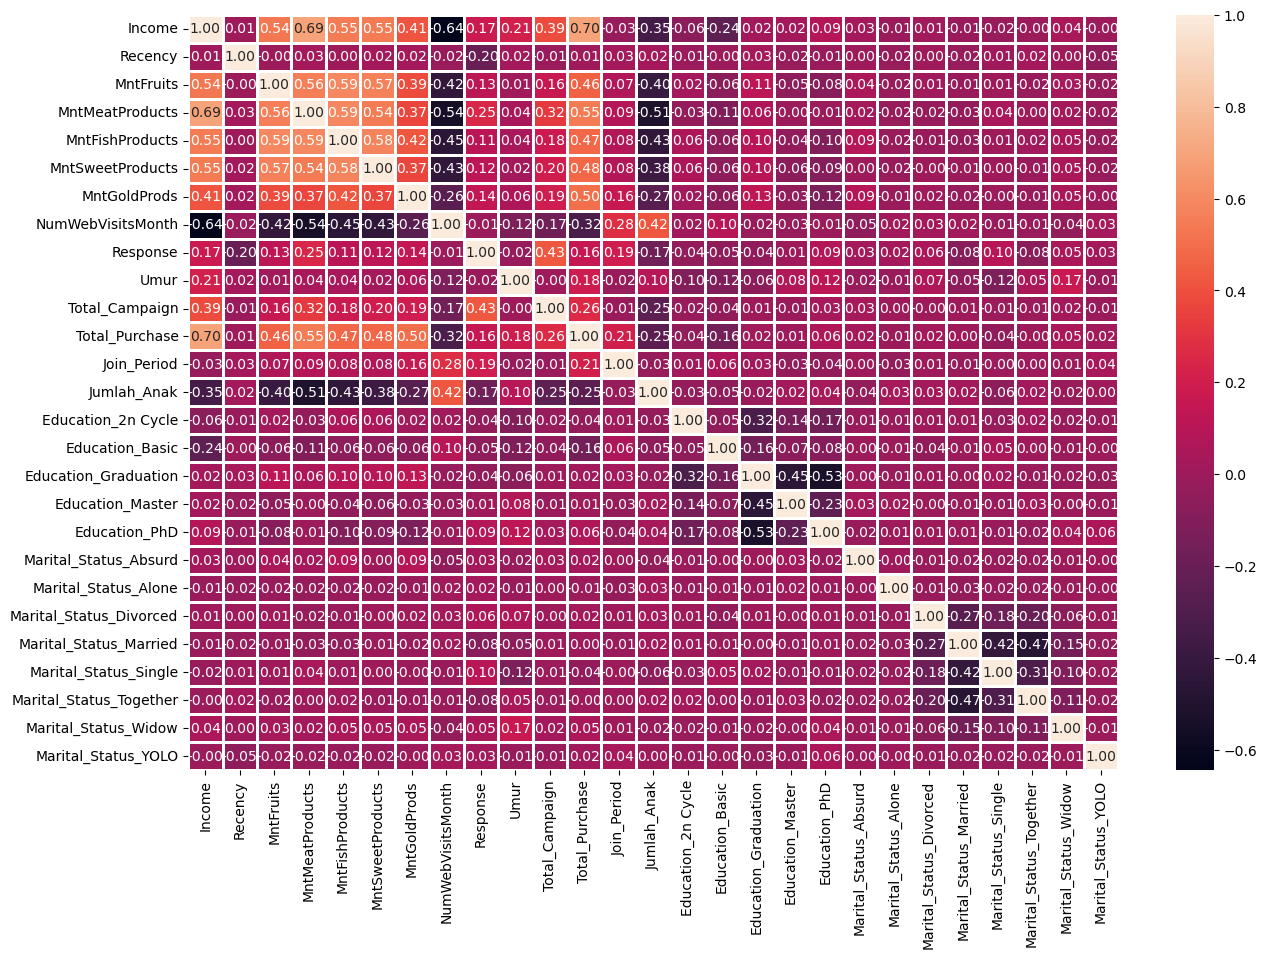

In [71]:
correlation = df_1.corr()

plt.figure(figsize=(15,10), dpi=100)
sns.heatmap(correlation, annot=True,  linewidth=2, fmt='.2f')

In [72]:
X = df_1.drop('Response', axis=1)
y = df_1['Response']

## Proses Modelling

In [73]:
from sklearn.model_selection import train_test_split

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from sklearn.preprocessing import StandardScaler, RobustScaler

from imblearn import over_sampling, under_sampling
#X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X, y)

In [74]:
## Standarisasi data mengunakan RobustScaler()

scaler = RobustScaler()

## X_train dilakukan fit dan transform
X = pd.DataFrame(
    scaler.fit_transform(X),
    columns = X.columns)

In [75]:
## Splitting data menjadi train and test

np.random.seed(42)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3)

In [76]:
## Oversampling pada data train

np.random.seed(42)
X_train1, y_train1 = over_sampling.SMOTE().fit_resample(X_train1, y_train1)

In [77]:
## pemodelan yang akan diuji untuk mengetahui score
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Decision Tree" : DecisionTreeClassifier(),
          "Adaboost Class" : AdaBoostClassifier(),
          "CatBoost Class" : CatBoostClassifier(),
          "XGB Class": XGBClassifier()}

# mealakukan pemodelan dengan melakukan fitting data dan model score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [78]:
np.random.seed(42)
model_scores = fit_and_score(models=models,
                             X_train=X_train1,
                             X_test=X_test1,
                             y_train=y_train1,
                             y_test=y_test1)
model_scores

Learning rate set to 0.015619
0:	learn: 0.6820160	total: 140ms	remaining: 2m 19s
1:	learn: 0.6728120	total: 146ms	remaining: 1m 12s
2:	learn: 0.6621513	total: 154ms	remaining: 51s
3:	learn: 0.6529989	total: 159ms	remaining: 39.5s
4:	learn: 0.6444359	total: 166ms	remaining: 33s
5:	learn: 0.6370420	total: 171ms	remaining: 28.4s
6:	learn: 0.6279907	total: 177ms	remaining: 25.2s
7:	learn: 0.6194405	total: 185ms	remaining: 23s
8:	learn: 0.6104737	total: 191ms	remaining: 21s
9:	learn: 0.6014209	total: 199ms	remaining: 19.7s
10:	learn: 0.5946013	total: 204ms	remaining: 18.4s
11:	learn: 0.5873954	total: 211ms	remaining: 17.3s
12:	learn: 0.5791487	total: 217ms	remaining: 16.5s
13:	learn: 0.5733759	total: 222ms	remaining: 15.6s
14:	learn: 0.5666950	total: 227ms	remaining: 14.9s
15:	learn: 0.5616762	total: 232ms	remaining: 14.3s
16:	learn: 0.5561818	total: 237ms	remaining: 13.7s
17:	learn: 0.5494328	total: 243ms	remaining: 13.2s
18:	learn: 0.5437422	total: 249ms	remaining: 12.9s
19:	learn: 0.5373

{'KNN': 0.7458893871449925,
 'Logistic Regression': 0.796711509715994,
 'Random Forest': 0.8968609865470852,
 'Decision Tree': 0.828101644245142,
 'Adaboost Class': 0.8684603886397608,
 'CatBoost Class': 0.8923766816143498,
 'XGB Class': 0.8863976083707026}

* ### Melakukan evaluasi serta penelusuran hasil lebih jauh dari model dengan nilai akurasi tinggi

In [79]:
np.random.seed(42)
clf = RandomForestClassifier()
clf.fit(X_train1, y_train1)
clf.score(X_test1, y_test1)

0.8968609865470852

In [80]:
y_preds1 = clf.predict(X_test1)

In [81]:
confusion_matrix(y_test1, y_preds1)

array([[543,  27],
       [ 42,  57]], dtype=int64)

In [82]:
# Show classification report
print(classification_report(y_test1, y_preds1))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       570
           1       0.68      0.58      0.62        99

    accuracy                           0.90       669
   macro avg       0.80      0.76      0.78       669
weighted avg       0.89      0.90      0.89       669



## ROC Curve

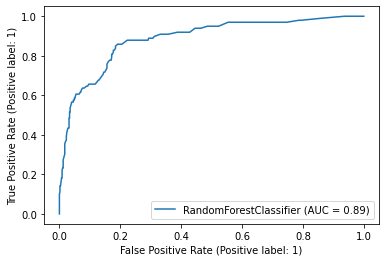

In [83]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(clf, X_test1, y_test1);

In [84]:
clf.score(X_train1, y_train1)

0.9966037735849057

In [85]:
clf.score(X_test1, y_test1)

0.8968609865470852

## Cross Validation

In [86]:
# Cross-validated accuracy score on Train dataset
cv_train = cross_val_score(clf,
                         X_train1,
                         y_train1,
                         cv=5, # 5-fold cross-validation
                         scoring='accuracy') # accuracy as scoring
cv_train

array([0.87169811, 0.96981132, 0.95849057, 0.94716981, 0.97358491])

In [87]:
cv_mean = np.mean(cv_train)
cv_mean

0.9441509433962263

In [88]:
# Cross-validated accuracy score on Test Dataset
cv_test = cross_val_score(clf,
                         X_test1,
                         y_test1,
                         cv=5, # 5-fold cross-validation
                         scoring='accuracy') # accuracy as scoring
cv_test

array([0.90298507, 0.87313433, 0.85820896, 0.90298507, 0.87969925])

In [89]:
cv_mean = np.mean(cv_test)
cv_mean

0.8834025361912243

In [90]:
from sklearn.model_selection import cross_validate

In [91]:
validation = cross_validate(clf, X_test1, y_test1, cv=5, return_train_score=True)

validation

{'fit_time': array([0.17333484, 0.14608669, 0.15972519, 0.15815878, 0.15619779]),
 'score_time': array([0.01264   , 0.01562333, 0.01656365, 0.        , 0.        ]),
 'test_score': array([0.87313433, 0.86567164, 0.86567164, 0.89552239, 0.87969925]),
 'train_score': array([0.99813084, 0.99813084, 0.99813084, 0.99626168, 0.99813433])}

In [92]:
validation = cross_validate(clf, X_test1, y_test1, cv=5, scoring='precision', return_train_score=True)

validation

{'fit_time': array([0.13887477, 0.14058304, 0.15716147, 0.16569543, 0.1433506 ]),
 'score_time': array([0.        , 0.01562691, 0.01237011, 0.00267577, 0.        ]),
 'test_score': array([0.85714286, 0.8       , 0.63636364, 1.        , 0.8       ]),
 'train_score': array([1.        , 1.        , 1.        , 0.98734177, 1.        ])}

# DATASET 2

In [93]:
df_2 = df.copy()
df_2

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Umur,Kelompok_Usia,Total_Campaign,Total_Purchase,Total_Spending,Join_Period,Jumlah_Anak
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,58,Baby boomers,0,25,1617,29,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,61,Baby boomers,0,6,27,11,2
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,50,Generasi X,0,21,776,18,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,31,Generasi Y,0,8,53,12,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,34,Generasi Y,0,19,422,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,48,Generasi X,0,18,1341,20,1
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,69,Baby boomers,1,22,444,8,3
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,34,Generasi Y,1,19,1241,13,0
2238,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,59,Baby boomers,0,23,843,13,1


In [94]:
## Membuang colom yang tidak relevan dan redundan

drop_col = ['Kidhome', 'Teenhome', 'Kelompok_Usia', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Total_Purchase', 'Total_Spending', 'NumCatalogPurchases', 'MntWines']

df_2 = df_2.drop(drop_col, axis=1)
df_2.head()

,Education,Marital_Status,Income,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Umur,Total_Campaign,Join_Period,Jumlah_Anak
0,Graduation,Single,58138.0,58,88,546,172,88,88,3,8,4,7,1,58,0,29,0
1,Graduation,Single,46344.0,38,1,6,2,1,6,2,1,2,5,0,61,0,11,2
2,Graduation,Together,71613.0,26,49,127,111,21,42,1,8,10,4,0,50,0,18,0
3,Graduation,Together,26646.0,26,4,20,10,3,5,2,2,4,6,0,31,0,12,1
4,PhD,Married,58293.0,94,43,118,46,27,15,5,5,6,5,0,34,0,13,1


In [95]:
df_2 = pd.get_dummies(df_2)
df_2

,Income,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Umur,Total_Campaign,Join_Period,Jumlah_Anak,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,58,88,546,172,88,88,3,8,4,7,1,58,0,29,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,46344.0,38,1,6,2,1,6,2,1,2,5,0,61,0,11,2,0,0,1,0,0,0,0,0,0,1,0,0,0
2,71613.0,26,49,127,111,21,42,1,8,10,4,0,50,0,18,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,26646.0,26,4,20,10,3,5,2,2,4,6,0,31,0,12,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,58293.0,94,43,118,46,27,15,5,5,6,5,0,34,0,13,1,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,43,182,42,118,247,2,9,4,5,0,48,0,20,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2236,64014.0,56,0,30,0,0,8,7,8,5,7,0,69,1,8,3,0,0,0,0,1,0,0,0,0,0,1,0,0
2237,56981.0,91,48,217,32,12,24,1,2,13,6,0,34,1,13,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2238,69245.0,8,30,214,80,30,61,2,6,10,3,0,59,0,13,1,0,0,0,1,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

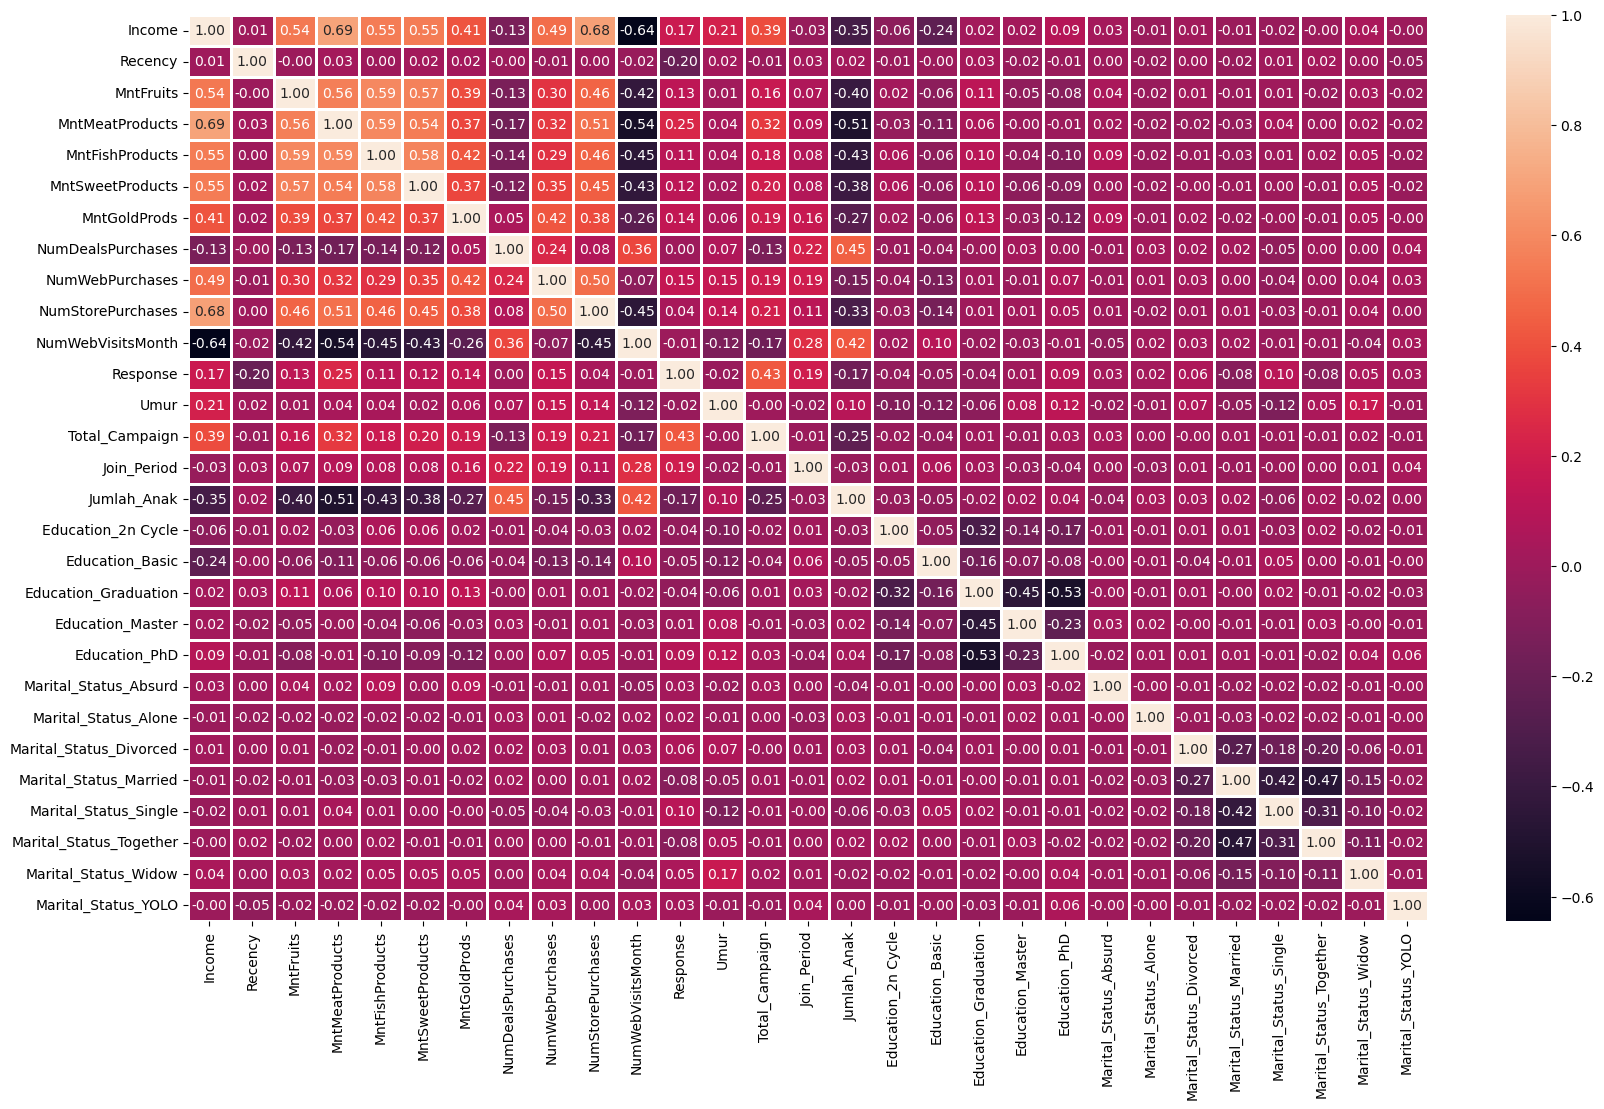

In [96]:
correlation = df_2.corr()

plt.figure(figsize=(20,12), dpi=100)
sns.heatmap(correlation, annot=True, linewidth=2, fmt='.2f')

* **Tidak ada korelasi antar feature yang melebihi threshold 0.7**

### Membagi dataset menjadi X (feature atau parameter) dan y (target variable)

In [97]:
X_2 = df_2.drop('Response', axis=1)
y_2 = df_2['Response']

In [98]:
## Standarisasi data mengunakan RobustScaler()
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

## X_train dilakukan fit dan transform
X_2 = pd.DataFrame(
    scaler.fit_transform(X_2),
    columns = X_2.columns)

In [99]:
X_2

,Income,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Umur,Total_Campaign,Join_Period,Jumlah_Anak,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.206868,0.18,2.580645,2.227907,3.404255,2.424242,1.361702,0.5,1.00,-0.2,0.25,0.722222,0.0,0.909091,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.153783,-0.22,-0.225806,-0.283721,-0.212766,-0.212121,-0.382979,0.0,-0.75,-0.6,-0.25,0.888889,0.0,-0.727273,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.618922,-0.46,1.322581,0.279070,2.106383,0.393939,0.382979,-0.5,1.00,1.0,-0.50,0.277778,0.0,-0.090909,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.756131,-0.46,-0.129032,-0.218605,-0.042553,-0.151515,-0.404255,0.0,-0.50,-0.2,0.00,-0.777778,0.0,-0.636364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.211608,0.90,1.129032,0.237209,0.723404,0.575758,-0.191489,1.5,0.25,0.2,-0.25,-0.611111,0.0,-0.545455,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,0.301205,-0.06,1.129032,0.534884,0.638298,3.333333,4.744681,0.0,1.25,-0.2,-0.25,0.166667,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2225,0.386551,0.14,-0.258065,-0.172093,-0.255319,-0.242424,-0.340426,2.5,1.00,0.0,0.25,1.333333,1.0,-1.000000,2.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2226,0.171488,0.84,1.290323,0.697674,0.425532,0.121212,0.000000,-0.5,-0.50,1.6,0.00,-0.611111,1.0,-0.545455,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2227,0.546511,-0.82,0.709677,0.683721,1.446809,0.666667,0.787234,0.0,0.50,1.0,-0.75,0.777778,0.0,-0.545455,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Proses Modelling

In [100]:
## Splitting data menjadi train and test

np.random.seed(42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.3)

In [101]:
## Oversampling pada data train

np.random.seed(42)
X_train2, y_train2 = over_sampling.SMOTE().fit_resample(X_train2, y_train2)

In [102]:
#X_train

In [103]:
## pemodelan yang akan diuji untuk mengetahui score
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Decision Tree" : DecisionTreeClassifier(),
          "Adaboost Class" : AdaBoostClassifier(),
          "CatBoost Class" : CatBoostClassifier(),
          "XGB Class": XGBClassifier()}

# mealakukan pemodelan dengan melakukan fitting data dan model score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [104]:
np.random.seed(42)
model_scores = fit_and_score(models=models,
                             X_train=X_train2,
                             X_test=X_test2,
                             y_train=y_train2,
                             y_test=y_test2)
model_scores

Learning rate set to 0.015619
0:	learn: 0.6835311	total: 6.34ms	remaining: 6.33s
1:	learn: 0.6718921	total: 10.9ms	remaining: 5.46s
2:	learn: 0.6607203	total: 15.9ms	remaining: 5.29s
3:	learn: 0.6498008	total: 20.6ms	remaining: 5.13s
4:	learn: 0.6411695	total: 25.4ms	remaining: 5.05s
5:	learn: 0.6328433	total: 30ms	remaining: 4.97s
6:	learn: 0.6235632	total: 34.5ms	remaining: 4.9s
7:	learn: 0.6127576	total: 39.2ms	remaining: 4.86s
8:	learn: 0.6040124	total: 43.9ms	remaining: 4.84s
9:	learn: 0.5968643	total: 48.6ms	remaining: 4.81s
10:	learn: 0.5880995	total: 53.3ms	remaining: 4.79s
11:	learn: 0.5807024	total: 58.2ms	remaining: 4.79s
12:	learn: 0.5729413	total: 62.8ms	remaining: 4.77s
13:	learn: 0.5653565	total: 67.3ms	remaining: 4.74s
14:	learn: 0.5588311	total: 71.9ms	remaining: 4.72s
15:	learn: 0.5529786	total: 77.4ms	remaining: 4.76s
16:	learn: 0.5463265	total: 81.9ms	remaining: 4.74s
17:	learn: 0.5397648	total: 86.6ms	remaining: 4.73s
18:	learn: 0.5344814	total: 91.4ms	remaining: 4

{'KNN': 0.7473841554559043,
 'Logistic Regression': 0.8131539611360239,
 'Random Forest': 0.8968609865470852,
 'Decision Tree': 0.8400597907324364,
 'Adaboost Class': 0.8714499252615845,
 'CatBoost Class': 0.8923766816143498,
 'XGB Class': 0.8729446935724963}

In [105]:
np.random.seed(42)

clf = RandomForestClassifier()
clf.fit(X_train2, y_train2)
clf.score(X_test2,y_test2)

0.8968609865470852

In [106]:
y_preds2 = clf.predict(X_test2)

In [107]:
confusion_matrix(y_test2, y_preds2)

array([[544,  26],
       [ 43,  56]], dtype=int64)

In [108]:
print(classification_report(y_test2, y_preds2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       570
           1       0.68      0.57      0.62        99

    accuracy                           0.90       669
   macro avg       0.80      0.76      0.78       669
weighted avg       0.89      0.90      0.89       669



In [109]:
np.random.seed(42)

cat_clf = CatBoostClassifier()
cat_clf.fit(X_train2, y_train2)
cat_clf.score(X_test2,y_test2)

Learning rate set to 0.015619
0:	learn: 0.6835311	total: 6.03ms	remaining: 6.03s
1:	learn: 0.6718921	total: 13.7ms	remaining: 6.86s
2:	learn: 0.6607203	total: 20.6ms	remaining: 6.84s
3:	learn: 0.6498008	total: 26.3ms	remaining: 6.54s
4:	learn: 0.6411695	total: 32.1ms	remaining: 6.39s
5:	learn: 0.6328433	total: 37.5ms	remaining: 6.21s
6:	learn: 0.6235632	total: 42.8ms	remaining: 6.07s
7:	learn: 0.6127576	total: 48.4ms	remaining: 6s
8:	learn: 0.6040124	total: 53.8ms	remaining: 5.92s
9:	learn: 0.5968643	total: 59.2ms	remaining: 5.87s
10:	learn: 0.5880995	total: 65ms	remaining: 5.84s
11:	learn: 0.5807024	total: 70.7ms	remaining: 5.82s
12:	learn: 0.5729413	total: 76.1ms	remaining: 5.78s
13:	learn: 0.5653565	total: 81.9ms	remaining: 5.77s
14:	learn: 0.5588311	total: 87.3ms	remaining: 5.73s
15:	learn: 0.5529786	total: 92.7ms	remaining: 5.7s
16:	learn: 0.5463265	total: 98.9ms	remaining: 5.72s
17:	learn: 0.5397648	total: 106ms	remaining: 5.78s
18:	learn: 0.5344814	total: 112ms	remaining: 5.77s


0.8923766816143498

In [110]:
y_preds = cat_clf.predict(X_test2)

In [111]:
confusion_matrix(y_test2, y_preds2)

array([[544,  26],
       [ 43,  56]], dtype=int64)

In [112]:
print(classification_report(y_test2, y_preds2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       570
           1       0.68      0.57      0.62        99

    accuracy                           0.90       669
   macro avg       0.80      0.76      0.78       669
weighted avg       0.89      0.90      0.89       669



### ROC Curve

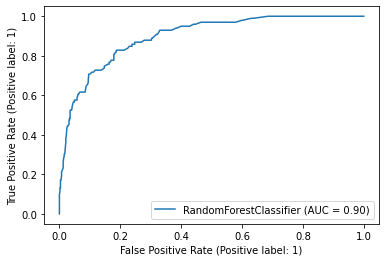

In [113]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(clf, X_test2, y_test2);

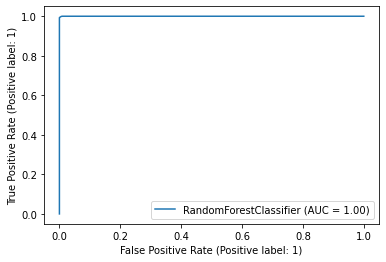

In [114]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(clf, X_train2, y_train2);

### Cross Validation

In [115]:
# Cross-validated accuracy score on Train dataset
cv_train = cross_val_score(clf,
                         X_train2,
                         y_train2,
                         cv=10, # 5-fold cross-validation
                         scoring='accuracy') # accuracy as scoring
print(cv_train)
print('nilai train rata rata: ', np.mean(cv_train))

[0.89433962 0.83773585 0.96603774 0.99245283 0.96603774 0.96226415
 0.96603774 0.95471698 0.96603774 0.98113208]
nilai train rata rata:  0.9486792452830188


In [116]:
# Cross-validated accuracy score on Test Dataset
cv_test = cross_val_score(clf,
                         X_test2,
                         y_test2,
                         cv=10, # 5-fold cross-validation
                         scoring='accuracy') # accuracy as scoring
print(cv_test)
print('nilai test rata rata : ',np.mean(cv_test))

[0.91044776 0.88059701 0.88059701 0.88059701 0.85074627 0.88059701
 0.89552239 0.89552239 0.86567164 0.89393939]
nilai test rata rata :  0.8834237901402082


In [117]:
validation = cross_validate(clf, X_2, y_2, cv=5, return_train_score=True)

validation

{'fit_time': array([0.26701903, 0.26556206, 0.26556373, 0.25348759, 0.26392746]),
 'score_time': array([0.01396823, 0.01562262, 0.01562023, 0.01562166, 0.01562428]),
 'test_score': array([0.87219731, 0.89461883, 0.87892377, 0.86995516, 0.89213483]),
 'train_score': array([0.99270892, 0.99270892, 0.99383062, 0.99495233, 0.99159193])}

In [118]:
validation = cross_validate(clf, X_train2, y_train2, cv=5, return_train_score=True)

validation

{'fit_time': array([0.3625052 , 0.3592906 , 0.3453238 , 0.34213662, 0.34366965]),
 'score_time': array([0.01562595, 0.01562142, 0.01562214, 0.01558924, 0.01562119]),
 'test_score': array([0.85660377, 0.97169811, 0.96603774, 0.95283019, 0.96981132]),
 'train_score': array([1.        , 0.99575472, 0.99669811, 0.99669811, 0.99622642])}

## DATASET 3 using Featurewizz

In [119]:
df_3 = df.copy()

In [120]:
df_3.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Umur,Kelompok_Usia,Total_Campaign,Total_Purchase,Total_Spending,Join_Period,Jumlah_Anak
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,58,Baby boomers,0,25,1617,29,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,61,Baby boomers,0,6,27,11,2
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,50,Generasi X,0,21,776,18,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,31,Generasi Y,0,8,53,12,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,34,Generasi Y,0,19,422,13,1


In [121]:
df_3 = pd.get_dummies(df_3)
df_3.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Umur,Total_Campaign,Total_Purchase,Total_Spending,Join_Period,Jumlah_Anak,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Kelompok_Usia_Baby boomers,Kelompok_Usia_Generasi X,Kelompok_Usia_Generasi Y,Kelompok_Usia_Pre-boomer
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,58,0,25,1617,29,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,61,0,6,27,11,2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,50,0,21,776,18,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,31,0,8,53,12,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,34,0,19,422,13,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [122]:
from featurewiz import FeatureWiz

Imported 0.2.04 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [123]:
X_3 = df_3.drop('Response', axis=1)
y_3 = df_3['Response']

In [124]:
## Standarisasi data mengunakan RobustScaler()

scaler = RobustScaler()

## X_train dilakukan fit dan transform
X_3 = pd.DataFrame(
    scaler.fit_transform(X_3),
    columns = X_3.columns)

In [125]:
np.random.seed(100)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y_3, test_size=0.3)

In [126]:
## Oversampling pada data train

np.random.seed(100)
X_train3, y_train3 = over_sampling.SMOTE().fit_resample(X_train3, y_train3)

wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (2634, 44)
    Some column names had special characters which were removed...
#### Singl

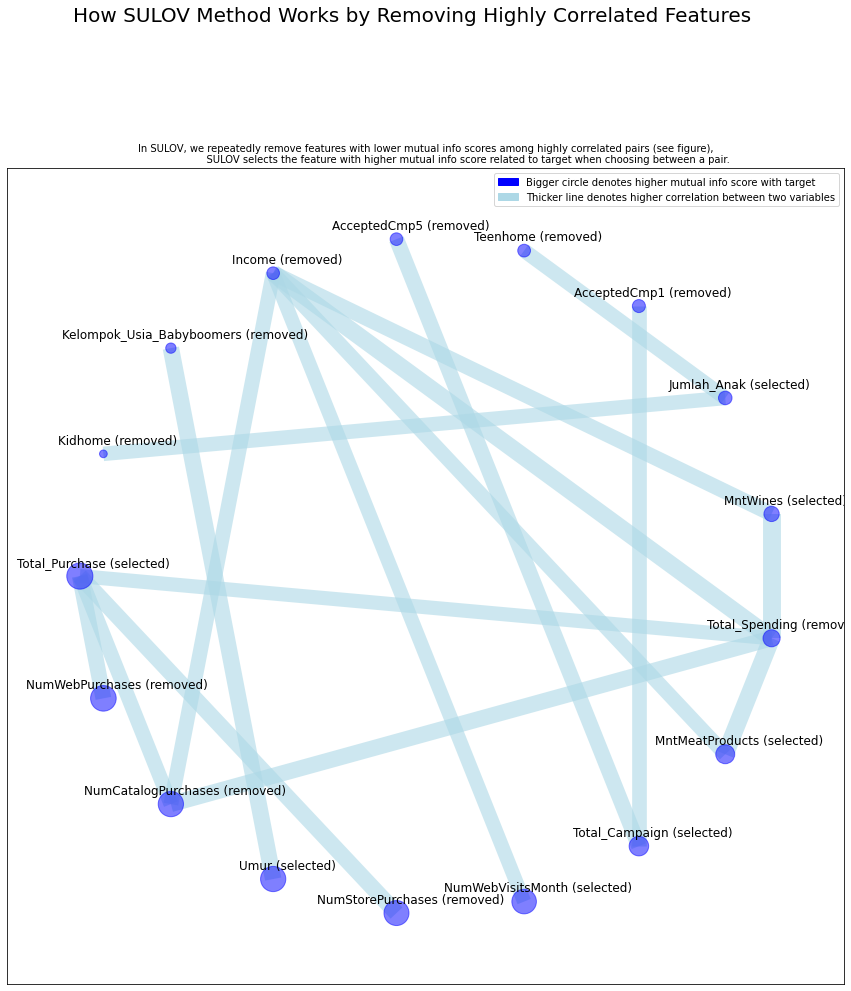

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 33
Finally 33 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 33 
    Taking top 10 features per iteration...
    XGBoost version using 1.7.3 as tree method: hist
Number of booster rounds = 100
        using 33 variables...
            selecting 13 features in this iteration
            Time taken for regular XGBoost feature selection = 0 seconds
        using 26 variables...
            selecting 11 features in this iteration
            Time taken for regular XGBoost feature selection = 0 seconds


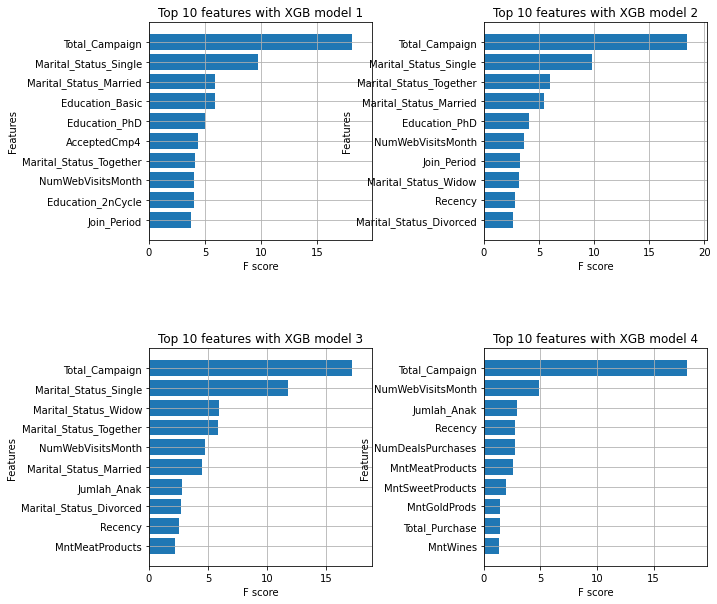

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 17 important features:
['Total_Campaign', 'Marital_Status_Single', 'Marital_Status_Married', 'Education_Basic', 'Education_PhD', 'AcceptedCmp4', 'Marital_Status_Together', 'NumWebVisitsMonth', 'Education_2nCycle', 'Join_Period', 'Recency', 'Marital_Status_Divorced', 'Kelompok_Usia_GenerasiY', 'Marital_Status_Widow', 'Jumlah_Anak', 'NumDealsPurchases', 'MntMeatProducts']
Total Time taken for featurewiz selection = 2 seconds
Output contains a list of 17 important features and a train dataframe
    Time taken to create entire pipeline = 2 second(s)


FeatureWiz(corr_limit=0.7)

In [127]:
### Feature Selection with FeatureWiz
features = FeatureWiz(corr_limit=0.70, feature_engg='', category_encoders='', dask_xgboost_flag=False, nrows=None, verbose=2)
X_train_selected = features.fit_transform(X_train3, y_train3)
X_test_selected = features.transform(X_test3)
features

In [128]:
X_test_selected

,Total_Campaign,Marital_Status_Single,Marital_Status_Married,Education_Basic,Education_PhD,AcceptedCmp4,Marital_Status_Together,NumWebVisitsMonth,Education_2n Cycle,Join_Period,Recency,Marital_Status_Divorced,Kelompok_Usia_Generasi Y,Marital_Status_Widow,Jumlah_Anak,NumDealsPurchases,MntMeatProducts
1772,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.25,0.0,-0.636364,0.46,0.0,0.0,0.0,1.0,0.5,-0.213953
967,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.00,0.0,0.818182,0.72,0.0,0.0,0.0,-1.0,-0.5,1.688372
1856,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.25,0.0,0.818182,-0.72,0.0,0.0,1.0,1.0,4.5,0.018605
1676,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.25,0.0,-0.727273,1.00,0.0,0.0,0.0,1.0,-0.5,-0.274419
1803,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.25,0.0,-1.000000,0.46,0.0,0.0,0.0,-1.0,-0.5,0.767442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.50,0.0,-0.727273,0.38,0.0,0.0,0.0,1.0,-0.5,-0.283721
1478,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.00,0.0,-1.000000,0.94,0.0,0.0,0.0,-1.0,-0.5,2.883721
1474,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,1.0,-0.272727,-0.34,0.0,1.0,0.0,0.0,-0.5,-0.255814
887,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.454545,0.08,1.0,0.0,0.0,-1.0,0.0,0.646512


In [129]:
## pemodelan yang akan diuji untuk mengetahui score
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Decision Tree" : DecisionTreeClassifier(),
          "Adaboost Class" : AdaBoostClassifier(),
          "CatBoost Class" : CatBoostClassifier(),
          "XGB Class": XGBClassifier()}

# mealakukan pemodelan dengan melakukan fitting data dan model score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(100)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [130]:
model_scores = fit_and_score(models=models,
                             X_train=X_train_selected,
                             X_test=X_test_selected,
                             y_train=y_train3,
                             y_test=y_test3)
model_scores

Learning rate set to 0.015579
0:	learn: 0.6838468	total: 4ms	remaining: 4s
1:	learn: 0.6713323	total: 7.84ms	remaining: 3.91s
2:	learn: 0.6623082	total: 11.6ms	remaining: 3.85s
3:	learn: 0.6530433	total: 15.2ms	remaining: 3.79s
4:	learn: 0.6404296	total: 19.1ms	remaining: 3.8s
5:	learn: 0.6311595	total: 22.9ms	remaining: 3.79s
6:	learn: 0.6217093	total: 26.6ms	remaining: 3.78s
7:	learn: 0.6120873	total: 30.2ms	remaining: 3.75s
8:	learn: 0.6049042	total: 34.2ms	remaining: 3.76s
9:	learn: 0.5960445	total: 37.9ms	remaining: 3.75s
10:	learn: 0.5863536	total: 41.5ms	remaining: 3.73s
11:	learn: 0.5790764	total: 45.2ms	remaining: 3.72s
12:	learn: 0.5731459	total: 48.6ms	remaining: 3.69s
13:	learn: 0.5653435	total: 52.2ms	remaining: 3.68s
14:	learn: 0.5589560	total: 55.9ms	remaining: 3.67s
15:	learn: 0.5514947	total: 59.7ms	remaining: 3.67s
16:	learn: 0.5438896	total: 63.5ms	remaining: 3.67s
17:	learn: 0.5366013	total: 67.2ms	remaining: 3.66s
18:	learn: 0.5301837	total: 70.8ms	remaining: 3.65s

{'KNN': 0.7653213751868461,
 'Logistic Regression': 0.8056801195814649,
 'Random Forest': 0.8878923766816144,
 'Decision Tree': 0.8086696562032885,
 'Adaboost Class': 0.8624813153961136,
 'CatBoost Class': 0.9013452914798207,
 'XGB Class': 0.8849028400597907}

In [131]:
np.random.seed(100)

cat_clf = RandomForestClassifier()
cat_clf.fit(X_train_selected, y_train3)
cat_clf.score(X_test_selected,y_test3)

0.8878923766816144

In [132]:
np.random.seed(100)
y_preds3 = cat_clf.predict(X_test_selected)

In [133]:
print(confusion_matrix(y_test3,y_preds3))

[[538  40]
 [ 35  56]]


In [134]:
print(classification_report(y_test3, y_preds3))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       578
           1       0.58      0.62      0.60        91

    accuracy                           0.89       669
   macro avg       0.76      0.77      0.77       669
weighted avg       0.89      0.89      0.89       669



In [135]:
cat_clf.score(X_train_selected,y_train3)

0.9958238420653

In [136]:
cat_clf.score(X_test_selected,y_test3)

0.8878923766816144

## ROC Curve

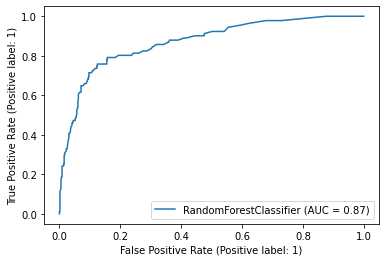

In [137]:
np.random.seed(100)
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(cat_clf, X_test_selected, y_test3);

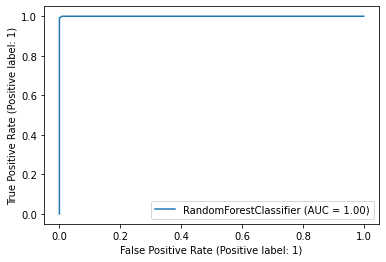

In [138]:
np.random.seed(100)
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(cat_clf, X_train_selected, y_train3);

## Cross Validation

## Hyper Paramater Tuning Process ( Pilihan Dataset ke - 2 )

In [ ]:
### Membuat hyper parameter tuning parameter for RandomForestClassifier() pada dataset ke-2

In [161]:
#parameter yang akan diuji dengan fungsi RandomizedSearchCV()

param_rf = {"n_estimators": (100, 150, 200),
           "max_depth": [None, 1, 3, 5],
           "criterion" : ['gini','entropy'],
           "min_samples_split": (2, 6, 8),
           "min_samples_leaf": (1, 5, 10)}

In [162]:
# menguji parameter dengan fungsi RandomizedSearchCV()

np.random.seed(42)

# melakukan setting random hyperparameter search for RandomForestClassifier
rf_random = GridSearchCV(RandomForestClassifier(),
                                param_grid=param_rf,
                                cv=5,
                                verbose=True)

rf_random.fit(X_train2, y_train2)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 3, 5],
                         'min_samples_leaf': (1, 5, 10),
                         'min_samples_split': (2, 6, 8),
                         'n_estimators': (100, 150, 200)},
             verbose=True)

In [163]:
# Hyper parameter terbaik dari proses RandomizedSearchCV()
rf_random.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [176]:
np.random.seed(42)
rf_random.score(X_test2, y_test2)

0.8953662182361734

In [177]:
## RandomForest tanpa hyper parameter tuning
np.random.seed(42)
clf2 = RandomForestClassifier(n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_depth=None, criterion='gini')
clf2.fit(X_train2, y_train2)
clf2.score(X_test2,y_test2)

0.890881913303438

In [171]:
y_preds_cv = clf2.predict(X_test2)

In [174]:
confusion_matrix(y_test2, y_preds_cv )

array([[544,  26],
       [ 47,  52]], dtype=int64)

In [175]:
print(classification_report(y_test2, y_preds2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       570
           1       0.68      0.57      0.62        99

    accuracy                           0.90       669
   macro avg       0.80      0.76      0.78       669
weighted avg       0.89      0.90      0.89       669



##### Hasil perbandingan tanpa hyperparamater tuning

In [178]:
np.random.seed(42)
clf = RandomForestClassifier()
clf.fit(X_train2, y_train2)
clf.score(X_test2,y_test2)

0.8968609865470852

In [179]:
y_preds2 = clf.predict(X_test2)

In [180]:
confusion_matrix(y_test2, y_preds2 )

array([[544,  26],
       [ 43,  56]], dtype=int64)

In [181]:
print(classification_report(y_test2, y_preds2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       570
           1       0.68      0.57      0.62        99

    accuracy                           0.90       669
   macro avg       0.80      0.76      0.78       669
weighted avg       0.89      0.90      0.89       669



### Feature Importances pada Dataset ke-2 setelah Modelling

In [182]:
clf2.feature_importances_

array([4.80344158e-02, 9.23097876e-02, 3.26246629e-02, 5.99856881e-02,
       3.86492706e-02, 3.85149074e-02, 5.89305815e-02, 2.99253512e-02,
       5.96390776e-02, 5.42039416e-02, 5.16163143e-02, 3.09289101e-02,
       1.71773867e-01, 6.24629988e-02, 3.36341025e-02, 6.71258251e-03,
       2.12295973e-03, 1.33255282e-02, 7.57622006e-03, 2.67966020e-02,
       1.71476016e-04, 8.47779896e-04, 1.86910967e-02, 1.87897267e-02,
       1.73605510e-02, 2.04852136e-02, 3.29616550e-03, 5.90220599e-04])

In [183]:
importances = clf2.feature_importances_
#
# feature yang terpenting pada proses machine learning
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df_2.columns[1:]
 
for f in range(X_train2.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 40,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Total_Campaign                           0.171774
 2) MntFruits                                0.092310
 3) Join_Period                              0.062463
 4) MntFishProducts                          0.059986
 5) NumStorePurchases                        0.059639
 6) NumDealsPurchases                        0.058931
 7) NumWebVisitsMonth                        0.054204
 8) Response                                 0.051616
 9) Recency                                  0.048034
10) MntSweetProducts                         0.038649
11) MntGoldProds                             0.038515
12) Jumlah_Anak                              0.033634
13) MntMeatProducts                          0.032625
14) Umur                                     0.030929
15) NumWebPurchases                          0.029925
16) Education_PhD                            0.026797
17) Marital_Status_Together                  0.020485
18) Marital_Status_Married                   0.018790
19) Marital_Status_Divorced 

In [184]:
# Match coef's of features to columns
feature_dict = dict(zip(df_2.columns, list(clf2.feature_importances_)))
feature_dict

{'Income': 0.048034415828409754,
 'Recency': 0.09230978756654927,
 'MntFruits': 0.03262466294211492,
 'MntMeatProducts': 0.05998568807395318,
 'MntFishProducts': 0.03864927060003512,
 'MntSweetProducts': 0.03851490742566021,
 'MntGoldProds': 0.058930581506693495,
 'NumDealsPurchases': 0.029925351217219957,
 'NumWebPurchases': 0.0596390775885844,
 'NumStorePurchases': 0.05420394162269833,
 'NumWebVisitsMonth': 0.05161631430389954,
 'Response': 0.030928910094745958,
 'Umur': 0.17177386728325342,
 'Total_Campaign': 0.06246299884240778,
 'Join_Period': 0.033634102469634025,
 'Jumlah_Anak': 0.00671258251403162,
 'Education_2n Cycle': 0.0021229597303376872,
 'Education_Basic': 0.013325528239449767,
 'Education_Graduation': 0.007576220059016787,
 'Education_Master': 0.026796601960588168,
 'Education_PhD': 0.0001714760161089101,
 'Marital_Status_Absurd': 0.0008477798957414412,
 'Marital_Status_Alone': 0.01869109673863157,
 'Marital_Status_Divorced': 0.018789726746455373,
 'Marital_Status_Marri

In [185]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df = feature_df.T

In [186]:
feature_df.columns = ['Value']

<Figure size 2000x1000 with 0 Axes>

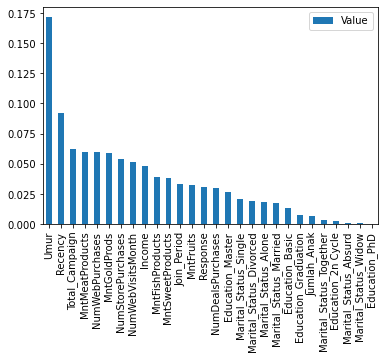

In [187]:
plt.figure(figsize=(20,10), dpi=100)
feature_df.sort_values(by='Value', ascending=False).plot(kind='bar')
plt.show()

## MODELLING WITH CLUSTERING METHOD (EXTRA STAGE 3)

In [188]:
df1 = pd.read_csv('marketing_campaign.csv', sep=';')
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Clustering berdasarkan RFM analysis yaitu faktor Recency, Frequency dan Monetary Value

### a. Create New Column : Monetary and Frequency

In [189]:
df1['Monetary'] = df1['MntWines'] + df1['MntFruits'] + df1['MntMeatProducts'] + df1['MntFishProducts'] + df1['MntSweetProducts'] + df1['MntGoldProds']
df1['Frequency_1'] = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases'] + df1['NumWebVisitsMonth']
df1['Frequency_2'] = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases']

### b. Drop Unused Column

In [190]:
#drop unused column, select frequency_1 when numberwebvisitsmonth is included
df2_1 = df1[['Frequency_1', 'Monetary', 'Recency','ID']]
df2_1 = df2_1.set_index(['ID'])
df2_1.head()

,Frequency_1,Monetary,Recency
ID,,,
5524,32,1617,58
2174,11,27,38
4141,25,776,26
6182,14,53,26
5324,24,422,94


In [191]:
df2_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Frequency_1  2240 non-null   int64
 1   Monetary     2240 non-null   int64
 2   Recency      2240 non-null   int64
dtypes: int64(3)
memory usage: 70.0 KB


In [192]:
df2_1.describe()

,Frequency_1,Monetary,Recency
count,2240.000000,2240.000000,2240.000000
mean,20.178571,605.798214,49.109375
std,7.293275,602.249288,28.962453
min,0.000000,5.000000,0.000000
25%,14.000000,68.750000,24.000000
50%,19.000000,396.000000,49.000000
75%,25.000000,1045.500000,74.000000
max,46.000000,2525.000000,99.000000


### c. Imputation

In [193]:
#checking null value
df2_1.isnull().sum()

Frequency_1    0
Monetary       0
Recency        0
dtype: int64

***Cause there's no null value, we don't need to do any imputation to RFM data***

### d. Handling Outliers with Z-Score

In [194]:
# Handling Outlier with Z-Score

#Import library
import numpy as np
import scipy.stats as stats

# Outlier umur dibuang karena dianggap tidak memiliki dampak yang signifikan jika outliernya dibuang

z_scores = np.abs(stats.zscore(df2_1))
filtered_entries = (z_scores < 3)
df2_1_zscore = df2_1[filtered_entries]

df2_1_zscore.describe()

# Terdapat 3 outlier yang dibuang berdasarkan kolom umur

,Frequency_1,Monetary,Recency
count,2237.000000,2235.000000,2240.000000
mean,20.145731,601.560626,49.109375
std,7.242678,596.208911,28.962453
min,0.000000,5.000000,0.000000
25%,14.000000,68.000000,24.000000
50%,19.000000,395.000000,49.000000
75%,25.000000,1041.000000,74.000000
max,41.000000,2352.000000,99.000000


In [195]:
df2_1_zscore.shape

(2240, 3)

***Since there's no outlier in data based on z_score test, there's no data discarded***

In [196]:
df2_1_zscore.isna().sum()

Frequency_1    3
Monetary       5
Recency        0
dtype: int64

In [197]:
df2_1_zscore= df2_1_zscore.fillna(df2_1_zscore.median())

In [198]:
df2_1_zscore.isna().sum()

Frequency_1    0
Monetary       0
Recency        0
dtype: int64

### e. Handling Outlier with IQR

In [199]:
import numpy as np
df2_1iqr = df2_1.fillna(0)
Q1 = df2_1iqr.quantile(0.25)
Q3 = df2_1iqr.quantile(0.75)
JAK = Q3 - Q1
df2_1iqr= df2_1iqr[~((df2_1iqr< (Q1 - 1.5 * JAK)) |(df2_1iqr> (Q3 + 1.5 * JAK))).any(axis=1)]
df2_1iqr.head()

,Frequency_1,Monetary,Recency
ID,,,
5524,32,1617,58
2174,11,27,38
4141,25,776,26
6182,14,53,26
5324,24,422,94


In [200]:
df2_1iqr.shape

(2234, 3)

## 3. Preeliminary Data Visualisation/Exploration

## 4. Feature Engineering

#### a. Standardization(if needed)
#### b. Convert Numpy to Array

In [201]:
#Standardize the data

from sklearn.preprocessing import StandardScaler

def standardizer(df2_1_zscore):
    data_columns = df2_1_zscore.columns
    data_index = df2_1_zscore.index
    normalize = StandardScaler()
    normalize.fit(df2_1_zscore)
    
    normalize_x = pd.DataFrame(normalize.transform(df2_1_zscore))
    normalize_x.columns = data_columns
    return normalize_x, normalize

X_normalized, normalize = standardizer(df2_1_zscore)
X_normalized.head()

,Frequency_1,Monetary,Recency
0,1.638372,1.705992,0.307039
1,-1.263651,-0.964080,-0.383664
2,0.671031,0.293709,-0.798086
3,-0.849076,-0.920418,-0.798086
4,0.532840,-0.300760,1.550305


In [202]:
X_normalized.shape

(2240, 3)

### b. Convert Numpy to Array

In [203]:
X_clust = df2_1_zscore
X_clust["Frequency_1"] = pd.to_numeric(X_clust["Frequency_1"])
X_clust["Monetary"] = pd.to_numeric(X_clust["Monetary"])
X_clust["Recency"] = pd.to_numeric(X_clust["Recency"])



In [204]:
print(X_clust.isna().sum())

Frequency_1    0
Monetary       0
Recency        0
dtype: int64


In [205]:
num_data = X_clust.iloc[:, :]

# mengubahnya menjadi array
num_array = np.array(num_data)
print(num_array)

[[  32. 1617.   58.]
 [  11.   27.   38.]
 [  25.  776.   26.]
 ...
 [  25. 1241.   91.]
 [  26.  843.    8.]
 [  18.  172.   40.]]


In [206]:
num_data.isnull().sum()

Frequency_1    0
Monetary       0
Recency        0
dtype: int64

# 5. Clustering

#### a. Elbow Method
#### b. Silhoutte Analysis
#### c. Create Final Cluster
#### d. Visualize and Evaluate

## a. Elbow Method

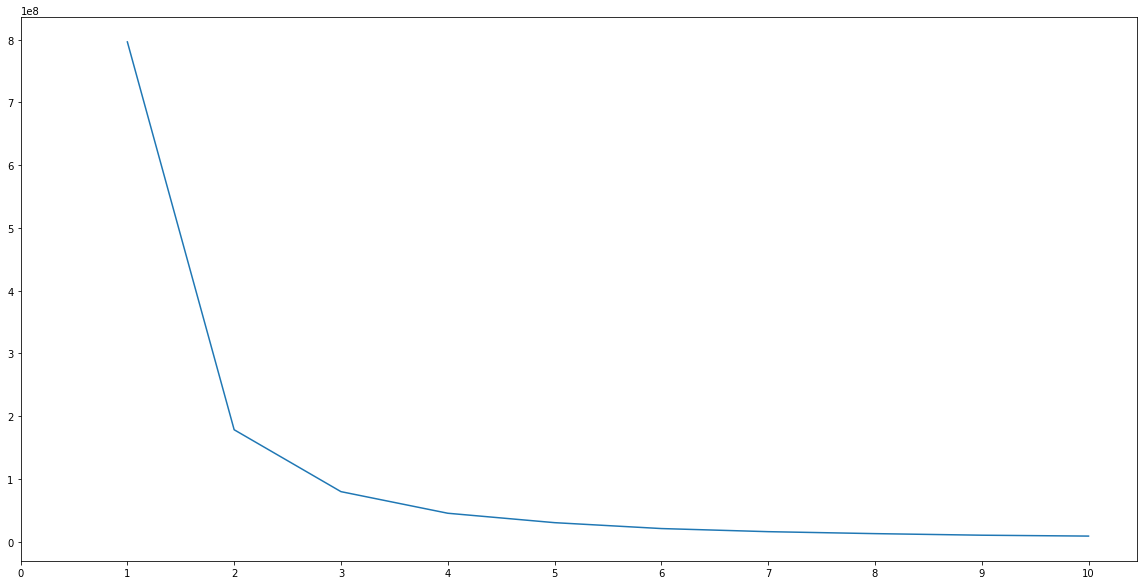

In [207]:
#Elbow Method 

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k).fit(num_data)
    centroids = kmeans.cluster_centers_
    prediksi = kmeans.predict(num_data)
    nilai_sse = 0
    
    for i in range(len(num_data)):
        titik_pusat = centroids[prediksi[i]]
        nilai_sse += ((num_data.iloc[i, 0] - titik_pusat[0]) ** 2 + (num_data.iloc[i, 1] - titik_pusat[1]) ** 2 + (num_data.iloc[i, 2] - titik_pusat[2]) ** 2)
    
    sse.append(nilai_sse)
    k_list.append(k)

plt.figure(figsize=(20,10))
plt.plot(k_list,sse)
plt.xticks(np.arange(0, 11, 1.0))
plt.show()

In [208]:
!pip install yellowbrick

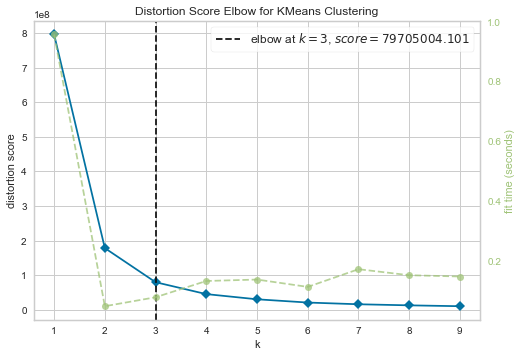

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=3), k=(1, 10))

In [209]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=3), num_data, k=(1,10))

## b. Silhoutte Analysis

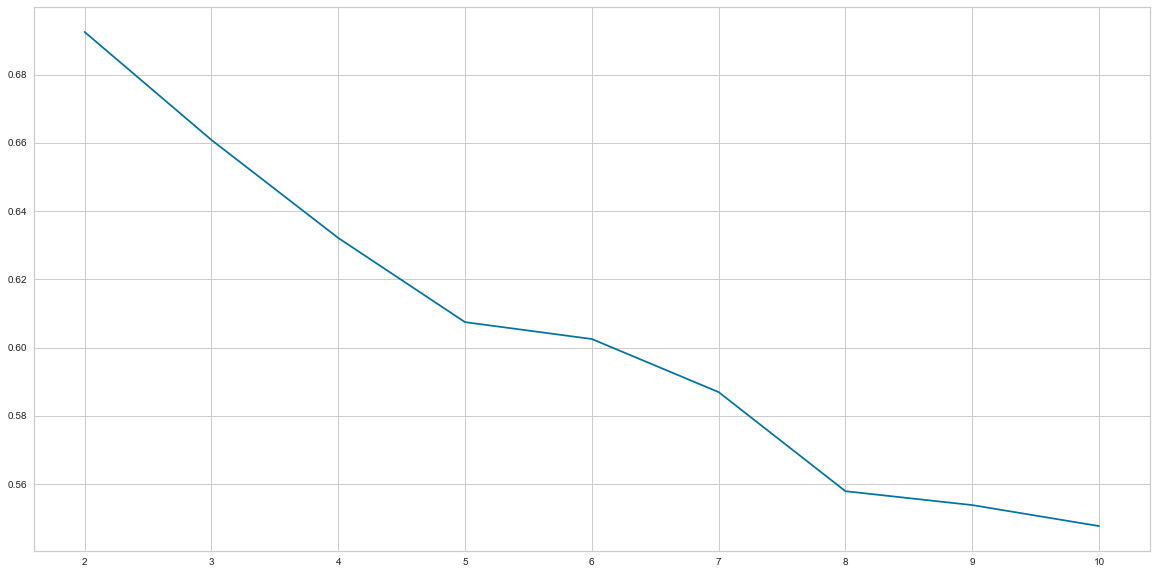

In [210]:
# Silhoutte Analysis

from sklearn.metrics import silhouette_score

daftar = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k).fit(num_data)
    labels = kmeans.labels_
    daftar.append(silhouette_score(num_data, labels, metric = 'euclidean'))
    k_list.append(k)

plt.figure(figsize=(20,10))
plt.plot(k_list,daftar)
plt.show()

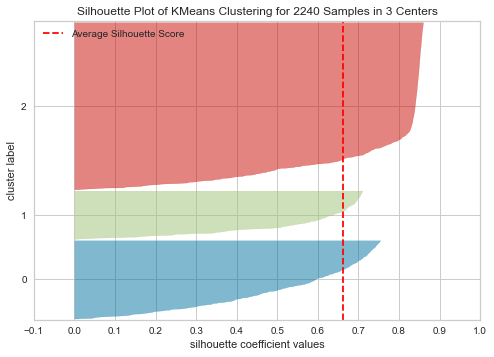

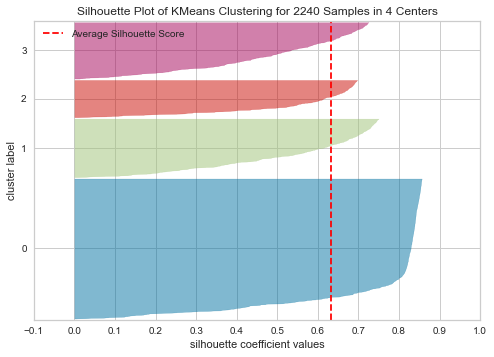

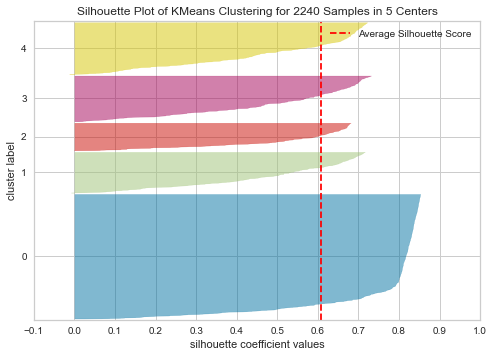

In [211]:
from yellowbrick.cluster import silhouette_visualizer

# Use the quick method and immediately show the figure

for i in [3, 4, 5]:
    silhouette_visualizer(KMeans(i, random_state=42), num_data, colors='yellowbrick')

## c. Create Final CLuster

In [212]:
# create final cluster
km = KMeans(
    n_clusters=3,
    random_state=42
)
kmeans = km.fit(num_data)
df2_1_zscore['Cluster'] = kmeans.labels_
df2_1_zscore.head()

,Frequency_1,Monetary,Recency,Cluster
ID,,,,
5524,32.0,1617.0,58,1
2174,11.0,27.0,38,2
4141,25.0,776.0,26,0
6182,14.0,53.0,26,2
5324,24.0,422.0,94,2


## d. Visualize and Evaluate

In [213]:
def plot_clusters(rfm):
        fig = plt.figure(figsize=(18,12))
        dx = fig.add_subplot(111, projection='3d')
        colors = ['green', 'blue', 'red', 'yellow']

        for i in range(0,len(rfm['Cluster'].unique())):
            dx.scatter(rfm[rfm.Cluster == i].Recency, 
                       rfm[rfm.Cluster == i].Frequency_1, 
                       rfm[rfm.Cluster == i].Monetary, 
                       c = colors[i], 
                       label = 'Cluster ' + str(i), 
                       s=10, alpha=1.0)
        dx.set_xlabel('Recency', fontsize=14)
        dx.set_ylabel('Frequency', fontsize=14)
        dx.set_zlabel('Monetary', fontsize=14)
        dx.legend(fontsize=12)
        dx.grid(True)

        # Save Figure
        ##plt.savefig(folder_result+'cluster_3d.png')

        # Show Figure
        plt.show()

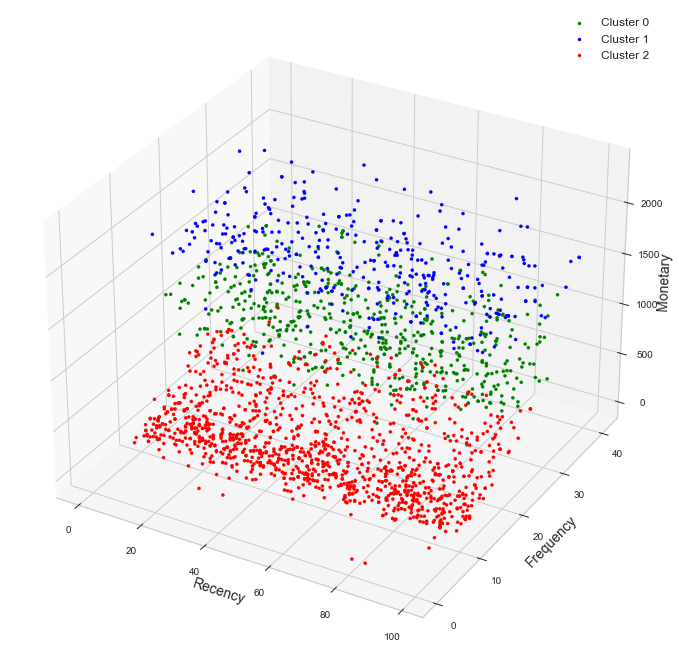

In [214]:
plot_clusters(df2_1_zscore)

## Merge the cluster data with response data

In [215]:
df2_1_zscore

,Frequency_1,Monetary,Recency,Cluster
ID,,,,
5524,32.0,1617.0,58,1
2174,11.0,27.0,38,2
4141,25.0,776.0,26,0
6182,14.0,53.0,26,2
5324,24.0,422.0,94,2
...,...,...,...,...
10870,23.0,1341.0,46,1
4001,29.0,444.0,56,2
7270,25.0,1241.0,91,0


In [216]:
df_rfm = df2_1_zscore
df_response = df1[['ID', 'Response']]

df_rfm_response = pd.merge(df_rfm, df_response, left_on='ID', right_on='ID')

df_rfm_response.head()

,ID,Frequency_1,Monetary,Recency,Cluster,Response
0,5524,32.0,1617.0,58,1,1
1,2174,11.0,27.0,38,2,0
2,4141,25.0,776.0,26,0,0
3,6182,14.0,53.0,26,2,0
4,5324,24.0,422.0,94,2,0


In [217]:
# Add the response column to your original dataframe

print('RFM Average for Each Segment')
# Group the data by cluster and aggregate the count, mean Recency, mean Frequency, mean Monetary, and sum of Responses
grouped = df_rfm_response.groupby('Cluster').agg({'Cluster': 'size', 'Recency': 'mean', 'Frequency_1': 'mean', 'Monetary': 'mean', 'Response': 'sum'})

# Rename the "Cluster" column to "Counts"
grouped.rename(columns={'Cluster': 'Counts'}, inplace=True)

# Compute the response rate column
grouped['Response_Rate'] = grouped['Response'] / grouped['Counts']

# Print the updated dataframe
print(grouped)



RFM Average for Each Segment
         Counts    Recency  Frequency_1     Monetary  Response  Response_Rate
Cluster                                                                      
0           597  48.891122    26.251256   911.482412        76       0.127303
1           369  50.772358    24.810298  1646.330623       129       0.349593
2          1274  48.729984    15.930926   152.913658       129       0.101256


In [218]:
Importancy = [] #membuat list kosong
for i, k in grouped.iterrows(): #iterasi setiap row
    if i == 0:
        cluster_name = 'Potential'
    elif i == 1:
        cluster_name = 'Important'
    else:
        cluster_name = 'Low'
    Importancy.append(cluster_name)
    
grouped['cluster'] = Importancy

In [219]:
grouped

,Counts,Recency,Frequency_1,Monetary,Response,Response_Rate,cluster
Cluster,,,,,,,
0,597,48.891122,26.251256,911.482412,76,0.127303,Potential
1,369,50.772358,24.810298,1646.330623,129,0.349593,Important
2,1274,48.729984,15.930926,152.913658,129,0.101256,Low


## Kesimpulan

- Metode K-Means Clustering dengan memanfaatkan RFM feature menghasilkan best cluster = 3
- Berdasarkan statistik dari masing-masing segmen/cluster menunjukkan bahwa terbaik (sekaligus minoritas) adalah segmen 1 (dari segi Monetary), setelah dicek, response rate mereka terhadap campaign yang dilakukan adalah yang paling tinggi. Sedangkan Cluster 0 merupakan Cluster di urutan 2 terbaik dan kita labeli sebagai potential (dilihat dari Frequency Visit dan Monetary). Segmen terburuk adalah segmen 2 (berdasarkan frequency dan monetary) dan response rate-nya pun paling rendah
- Hasil segmentasi tersebut dapat digunakan untuk menetapkan skala prioritas dalam campaign selanjutnya . Segmen Important perlu mendapat perhatian khusus karena berpotensi meningkatkan revenue perusahaan, disusul segmen Potential. Untuk segmen dengan prospek Low, campaign tetap bisa dilaksanakan namun tetap memperhatikan efektivitas dan efisiensi (salah satunya dengan melakukan prediksi melalui promo redemption model).